In [297]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None 


In [298]:
def quitar_comillas_2 (col):
        try:
            return col.split(',')
        except:
            np.nan

### Q5 - Analizamos los roles dentro del mundo data para ver si el curso que quiere ofrecer Adalab (bootcamp para convertirse en analista de datos junior)

In [299]:
df_completo = pd.read_csv('./datos/HU2.csv', index_col = 0)
df_completo.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?DataCamp?,NaN
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,Kaggle Notebooks?Colab Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?,NaN
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Data Lake Storage ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
df_q5=df_completo['q5'].reset_index()
df_q5

,index,q5
0,0,Other
1,1,Program/Project Manager
2,2,Software Engineer
3,3,Research Scientist
4,4,Other
...,...,...
25968,25968,Data Analyst
25969,25969,Student
25970,25970,Research Scientist
25971,25971,Data Scientist


In [301]:
df_q5['q5'] = df_q5['q5'].apply(quitar_comillas_2)
df_5_explode = df_q5['q5'].explode().reset_index()
gb5 = df_5_explode.groupby('q5').size()
df_q5 = gb5.reset_index(name='count')
df_q5.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Roles'), Text(0.5, 0, 'Conteo')]

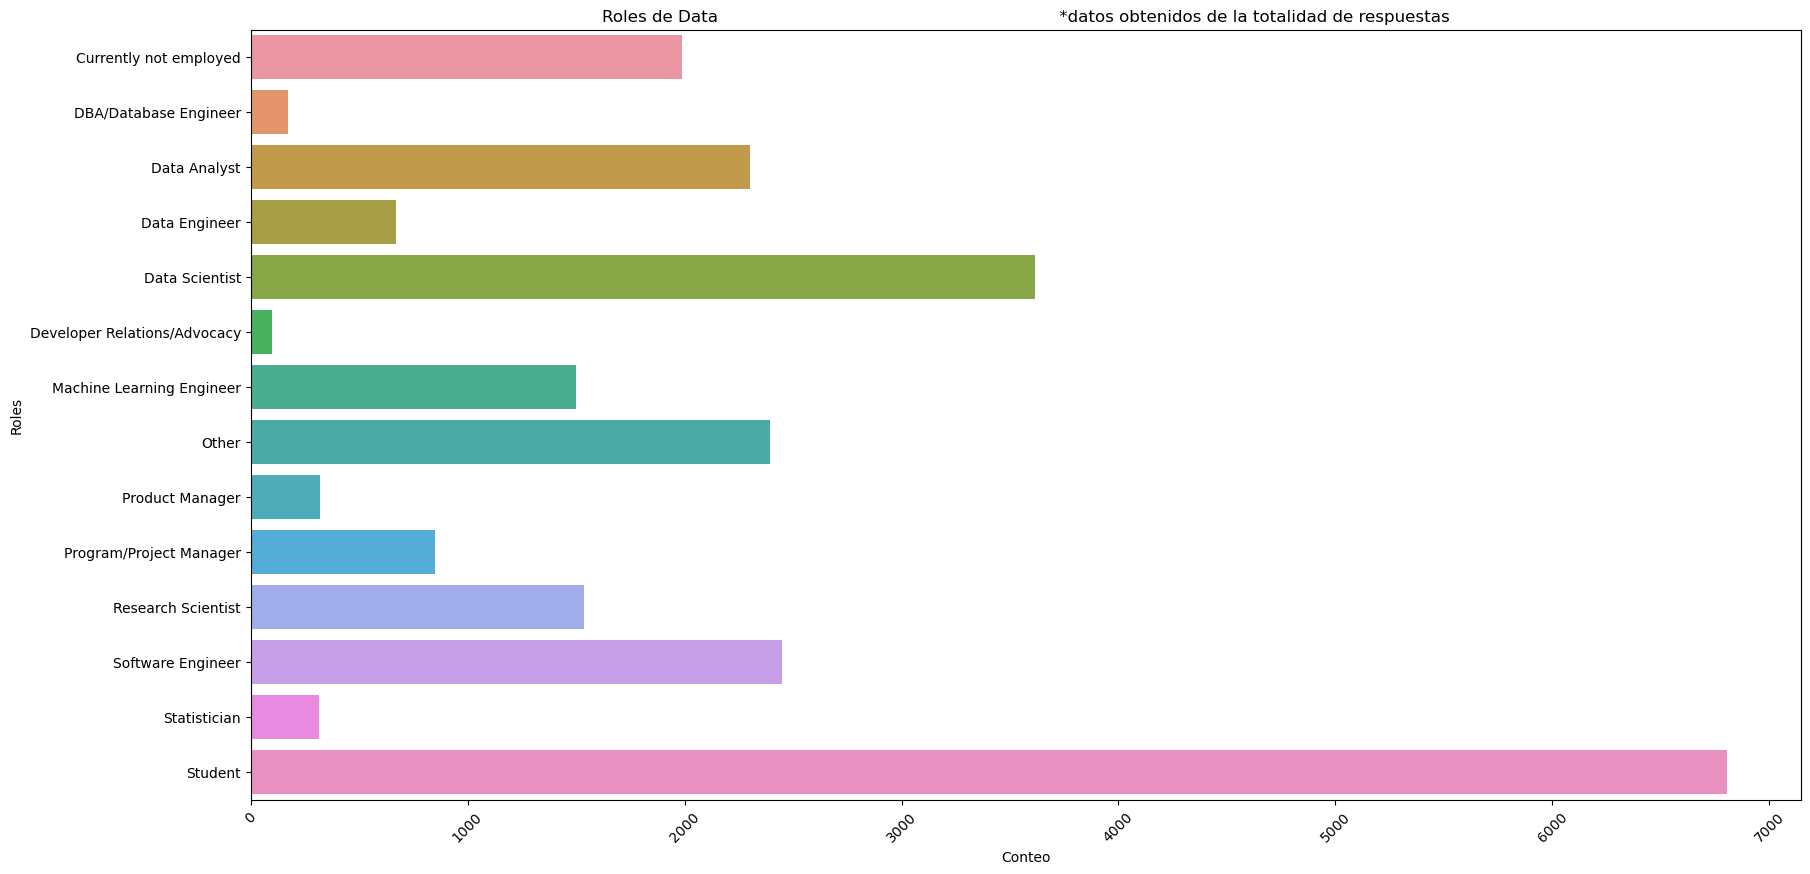

In [302]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q5', data=df_q5)
plt.title('Roles de Data                                                                 *datos obtenidos de la totalidad de respuestas')
plt.xticks(rotation = 45)
fig.set(ylabel='Roles', xlabel= 'Conteo')

# Creamos a nuestra persona, que responderá al target deseado para el cliente de Adalab: Analista de datos junior, con ninguna experiencia o una máxima de 2 años programando.
#### De esta manera, cargamos el DF filtrado por rol (q5 = data analyst) y por años de experiencia programando (q6 = I have never written code, < 1 years, o 1-2 years) 

In [303]:
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter ,PyCharm ,MATLAB ,Jupyter Notebook",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?,Twitter (data science influencers)?
66,66,China,Data Analyst,< 1 years,Python,A laptop,Never,< 1 year,I do not know,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"PyCharm , Spyder",None,None,Other,Other,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,India,Data Analyst,< 1 years,Python,A laptop,Once,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Jupyter ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN
108,108,Israel,Data Analyst,< 1 years,Python,A personal computer / desktop,Never,I do not use machine learning methods,We use ML methods for generating insights (but...,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL","Jupyter Notebook, Other",None,"Matplotlib ,Seaborn",NaN,NaN,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN


In [304]:
df['q6'].unique() # años de experiencia deseados para nuestra persona

array(['< 1 years', 'I have never written code'], dtype=object)

In [305]:
df['q5'].unique() # rol deseado de nuestra persona

array(['Data Analyst'], dtype=object)

### Q7 - analizamos los lenguages de programación que se utilizan más

In [306]:
df_q7=df['q7'].reset_index()
df_q7

,index,q7
0,32,R
1,46,"Python, SQL, C, C++, Java, Javascript, MATLAB"
2,66,Python
3,102,Python
4,108,"Python, SQL"
...,...,...
746,25811,"Python, SQL"
747,25819,SQL
748,25909,"Python, SQL"
749,25916,"Python, SQL"


Q14_

In [466]:
df_q14=df['q14'].reset_index()
df_q14

,index,q14
0,32,Ggplot / ggplot2
1,46,"Matplotlib ,Plotly / Plotly Express"
2,66,None
3,102,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
4,108,"Matplotlib ,Seaborn"
...,...,...
746,25811,"Matplotlib ,Seaborn ,Plotly / Plotly Express"
747,25819,None
748,25909,NaN
749,25916,"Matplotlib ,Seaborn"


In [467]:
df_q14['q14'] = df_q14['q14'].apply(quitar_comillas_2)
df_q14_explode = df_q14['q14'].explode().reset_index()
gb14 = df_q14_explode.groupby('q14').size()
df_q14 = gb14.reset_index(name='count')
df_q14.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Librerías'), Text(0.5, 0, 'Conteo')]

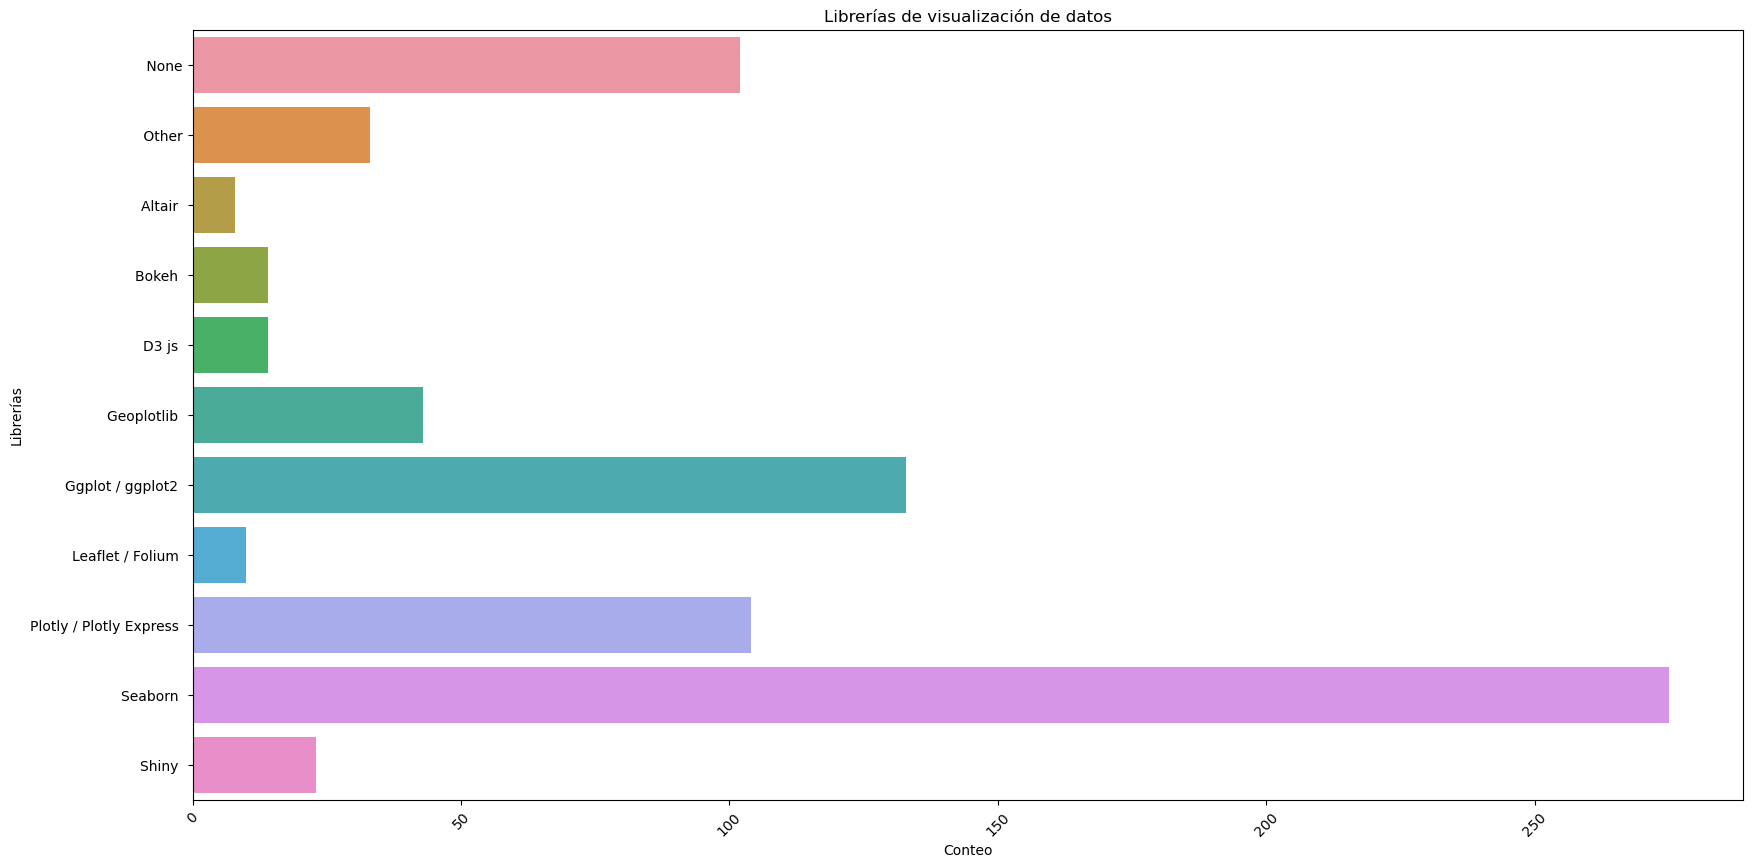

In [469]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q14', data=df_q14)
plt.title('Librerías de visualización de datos')
plt.xticks(rotation = 45)
fig.set(ylabel='Librerías', xlabel= 'Conteo')

In [307]:
df_q7['q7'] = df_q7['q7'].apply(quitar_comillas_2)
df_7_explode = df_q7['q7'].explode().reset_index()
gb7 = df_7_explode.groupby('q7').size()
df_q7 = gb7.reset_index(name='count')
df_q7.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Lenguajes'), Text(0.5, 0, 'Conteo')]

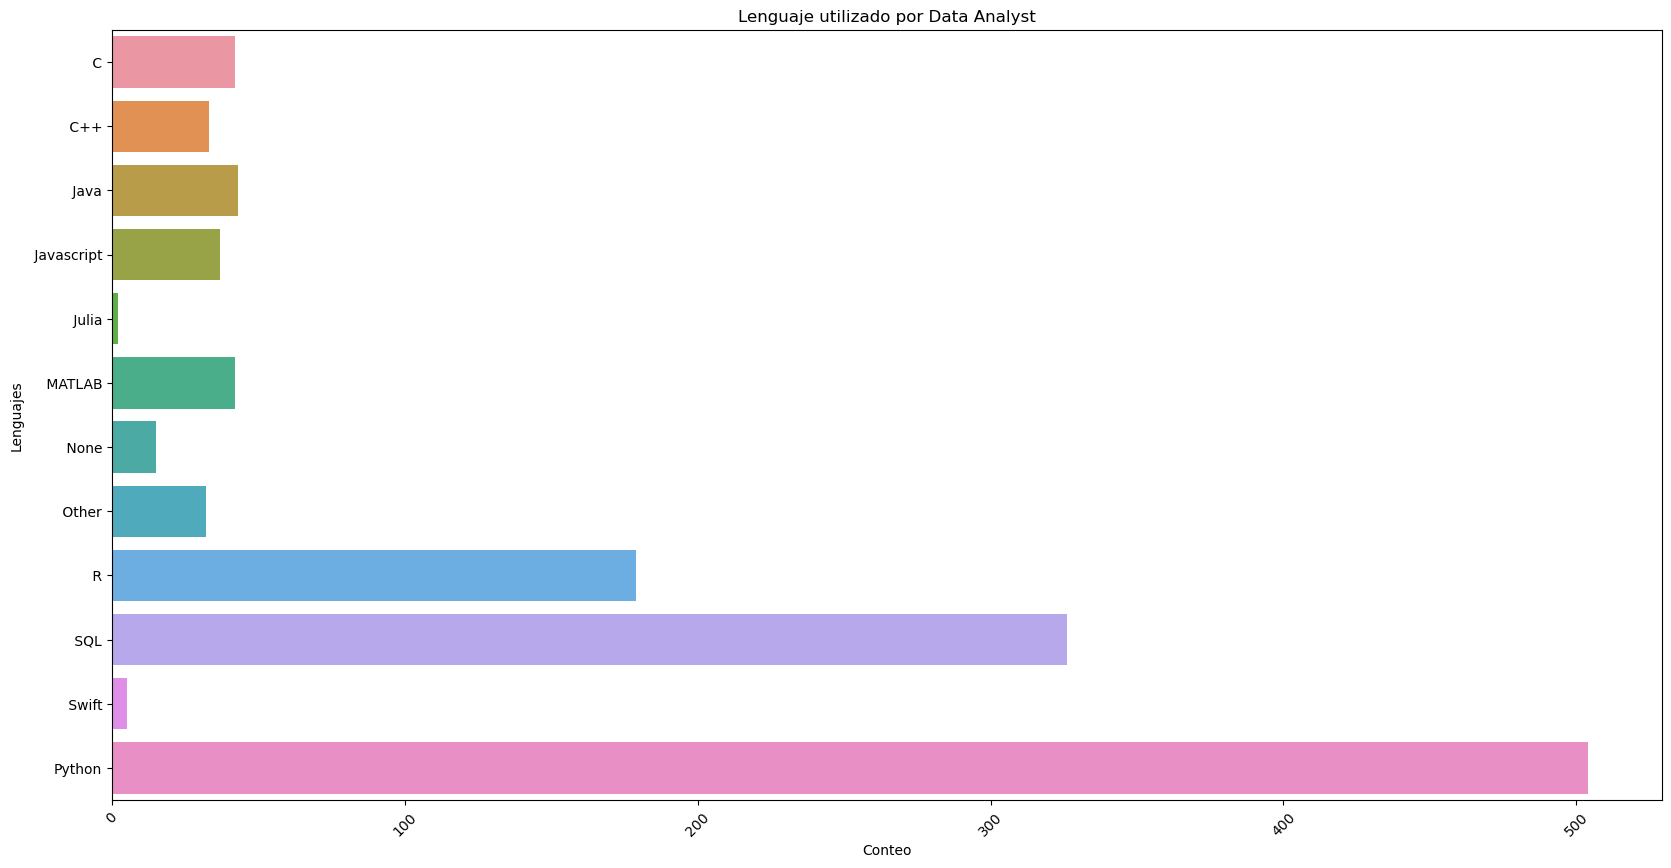

In [308]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q7', data=df_q7)
plt.title('Lenguaje utilizado por Data Analyst')
plt.xticks(rotation = 45)
fig.set(ylabel='Lenguajes', xlabel= 'Conteo')

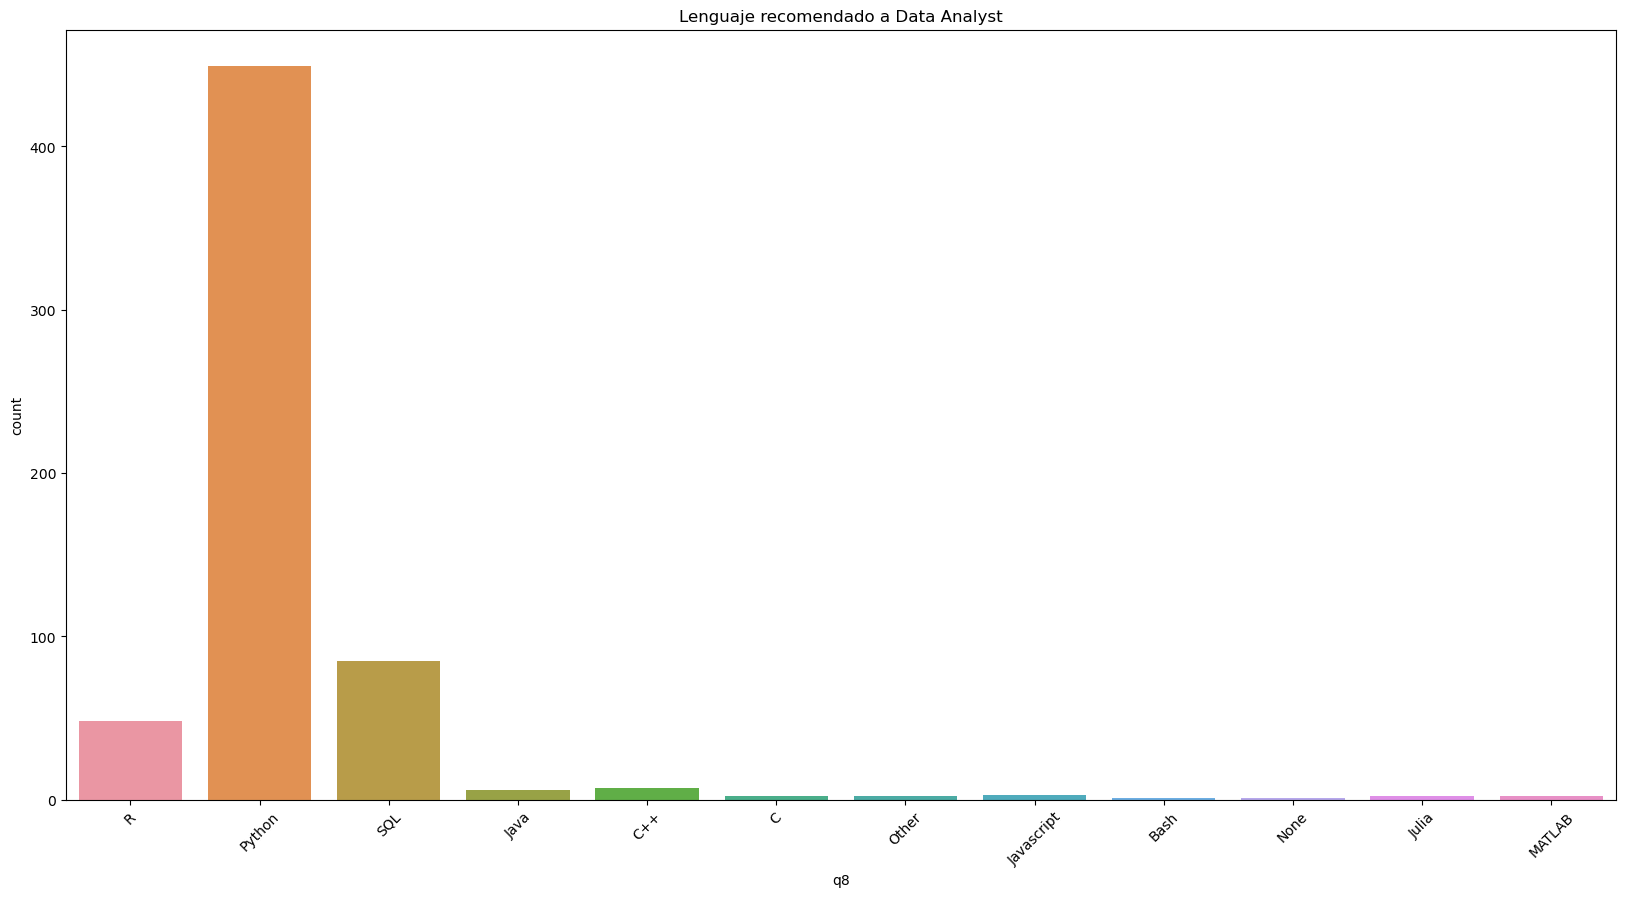

In [309]:
plt.figure(figsize=(20,10))
sns.countplot(x ='q8', data=df)
plt.title('Lenguaje recomendado a Data Analyst')
plt.xticks(rotation = 45);

### Q9 - analizamos los entornos de desarrollo integrados que utiliza nuestra persona

In [310]:
df_q9=df['q9'].reset_index()
df_q9

,index,q9
0,32,RStudio
1,46,"Jupyter ,PyCharm ,MATLAB ,Jupyter Notebook"
2,66,"PyCharm , Spyder"
3,102,"Jupyter ,Jupyter Notebook"
4,108,"Jupyter Notebook, Other"
...,...,...
746,25811,"PyCharm , Vim / Emacs,Jupyter Notebook"
747,25819,Visual Studio
748,25909,Jupyter Notebook
749,25916,Jupyter Notebook


In [311]:
df_q9['q9'] = df_q9['q9'].apply(quitar_comillas_2)
df_9_explode = df_q9['q9'].explode().reset_index()
gb9 = df_9_explode.groupby('q9').size()
df_q9 = gb9.reset_index(name='count')
df_q9.drop(0, axis= 0,inplace=True)

In [312]:
df_q9['q9'].head()

1        Notepad++
2            Other
3           Spyder
4     Sublime Text
5      Vim / Emacs
Name: q9, dtype: object

In [313]:
df_q9['q9'].unique()

array([' Notepad++', ' Other', ' Spyder', ' Sublime Text', ' Vim / Emacs',
       'Jupyter  ', 'Jupyter Notebook', 'MATLAB ', 'PyCharm ', 'RStudio ',
       'Visual Studio ', 'Visual Studio Code  '], dtype=object)

[Text(0, 0.5, 'Entornos'), Text(0.5, 0, 'Conteo')]

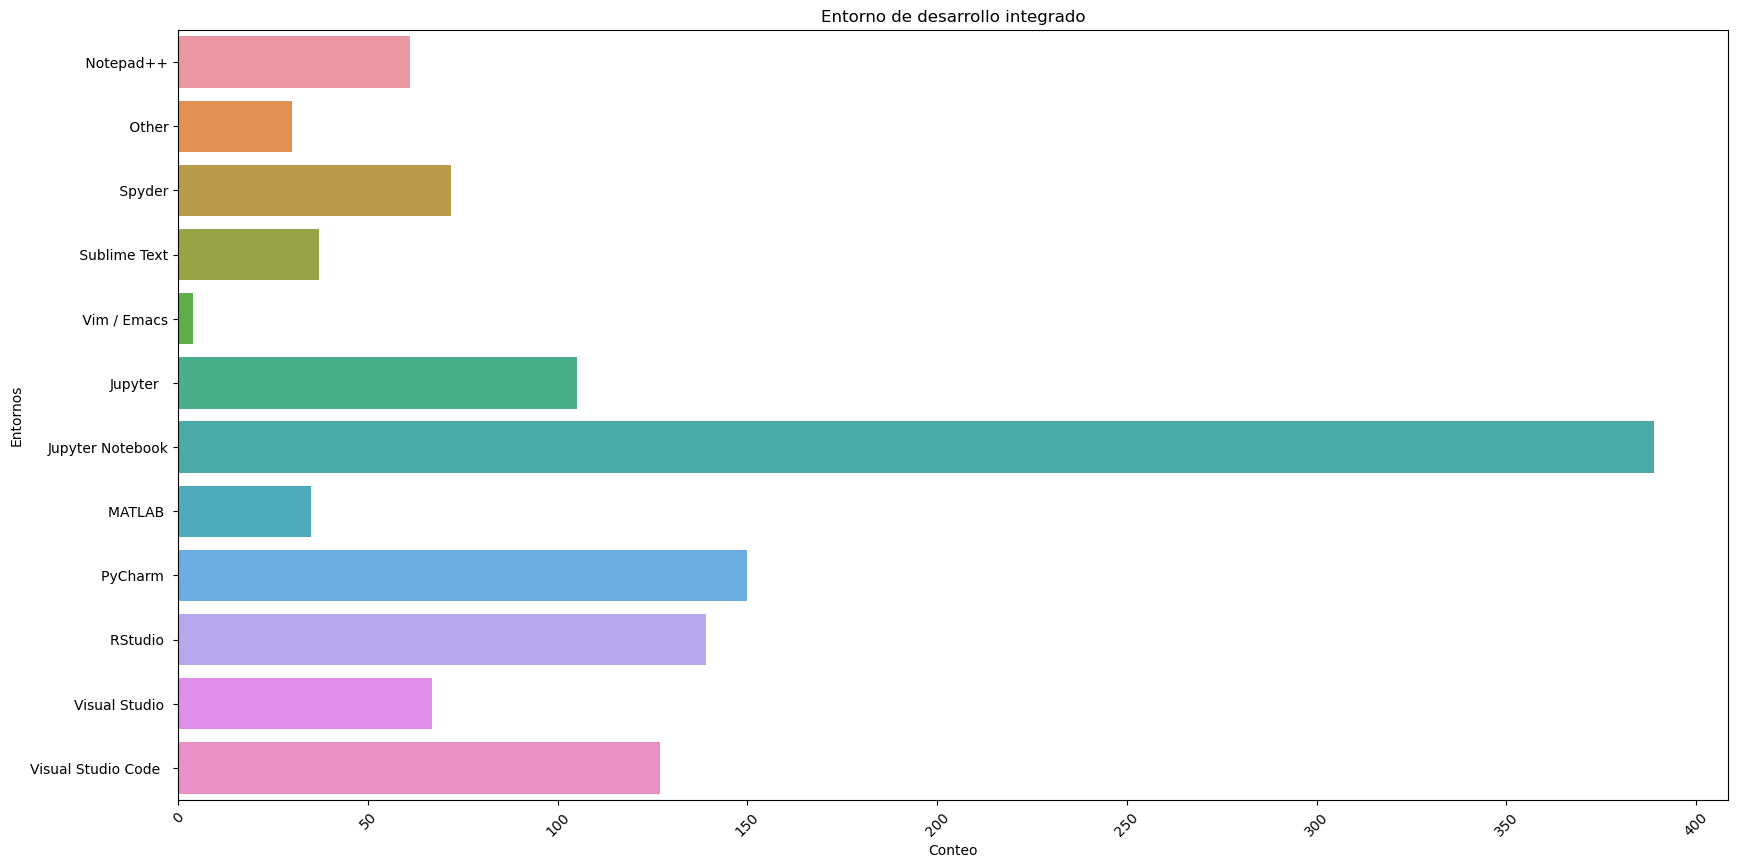

In [314]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q9', data=df_q9)
plt.title('Entorno de desarrollo integrado')
plt.xticks(rotation = 45)
fig.set(ylabel='Entornos', xlabel= 'Conteo')

### Q11 - analizamos computador que utiliza nuestra persona para participar en los proyectos de data

In [315]:
df_q11=df['q11'].reset_index()
df_q11

,index,q11
0,32,A personal computer / desktop
1,46,A personal computer / desktop
2,66,A laptop
3,102,A laptop
4,108,A personal computer / desktop
...,...,...
746,25811,A laptop
747,25819,A laptop
748,25909,A laptop
749,25916,A laptop


In [316]:
df_q11['q11'] = df_q11['q11'].apply(quitar_comillas_2)
df_11_explode = df_q11['q11'].explode().reset_index()
gb11 = df_11_explode.groupby('q11').size()
df_q11 = gb11.reset_index(name='count')
df_q11.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Herramienta'), Text(0.5, 0, 'Conteo')]

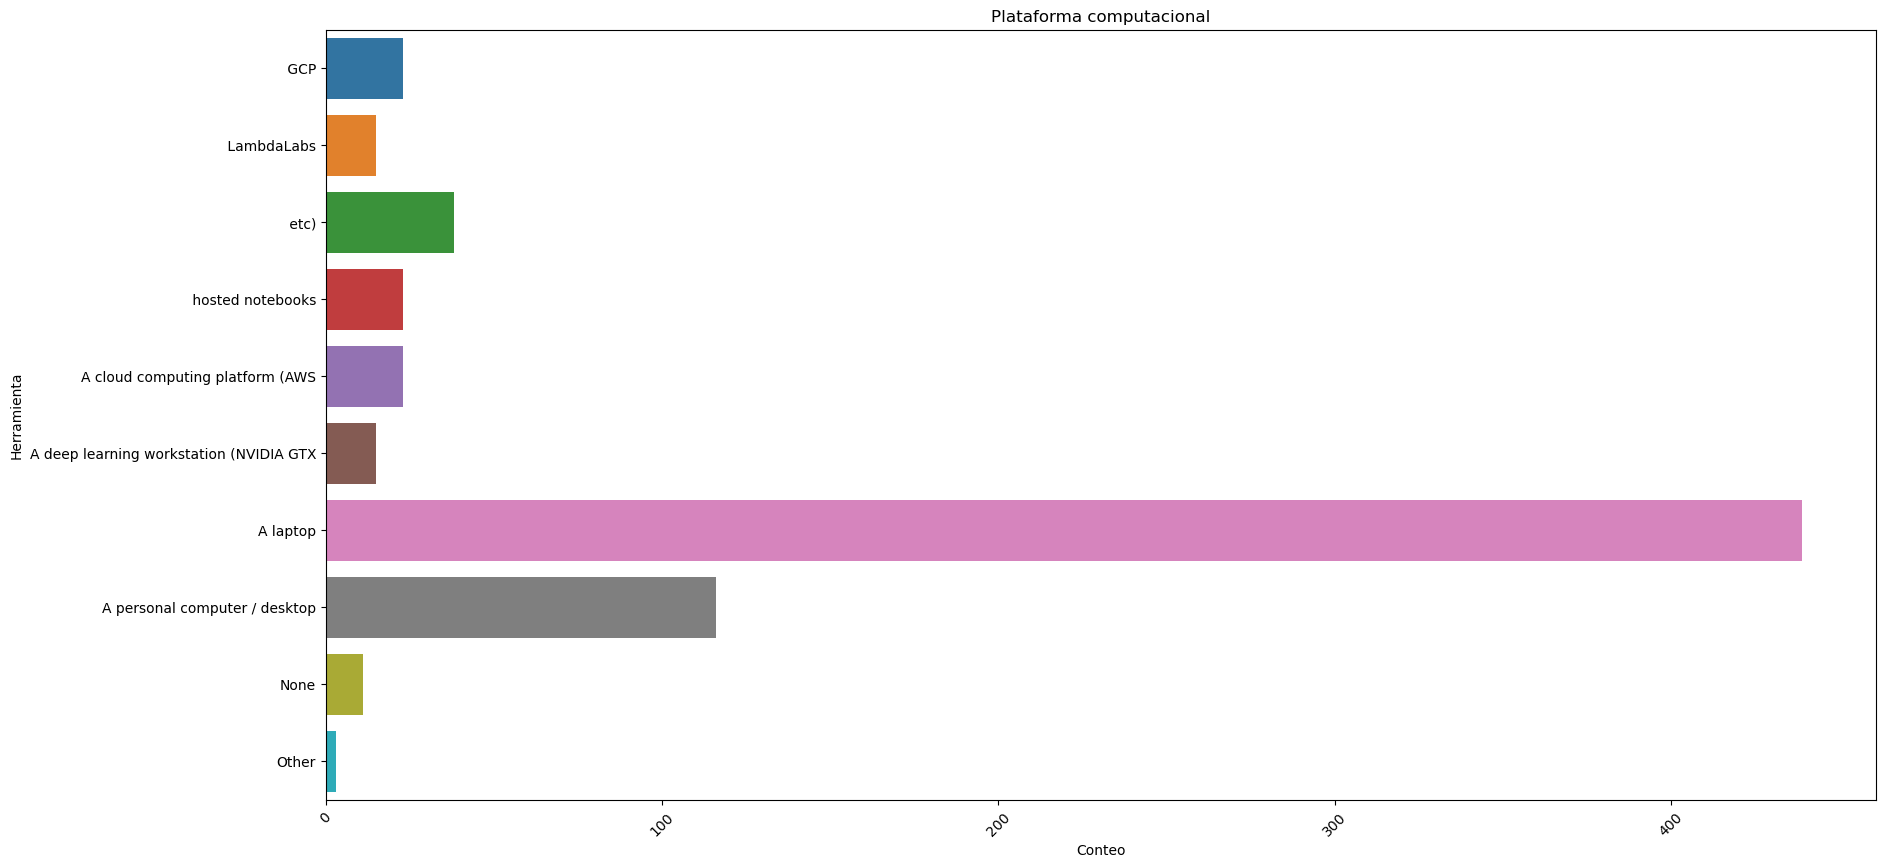

In [317]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q11', data=df_q11)
plt.title('Plataforma computacional')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo')

In [318]:

def quitar_comillas (col):
        try:
            return col.split('?')
        except:
            np.nan

In [319]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,32,NaN
1,46,Kaggle Notebooks?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [320]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [321]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [322]:
df_10_explode

,index,q10
0,0,None
1,1,Kaggle Notebooks
2,1,
3,2,None
4,3,None
...,...,...
1070,746,None
1071,747,None
1072,748,None
1073,749,None


In [323]:
df_10_explode['q10'].unique()

array([None, ' Kaggle Notebooks', '', 'Colab Notebooks',
       'Azure Notebooks', ' Paperspace / Gradient ',
       ' Binder / JupyterHub ', ' Code Ocean ', ' IBM Watson Studio ',
       ' Amazon Sagemaker Studio Notebooks ', ' Amazon EMR Notebooks ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ',
       'Google Cloud Datalab', ' Databricks Collaborative Notebooks ',
       ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ',
       ' Observable Notebooks '], dtype=object)

In [324]:
df_10_explode=df_10_explode.fillna('ninguno')

In [325]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [326]:
df_q10 = gb.reset_index(name='count')

In [327]:
df_q10.drop(0, axis= 0,inplace=True)

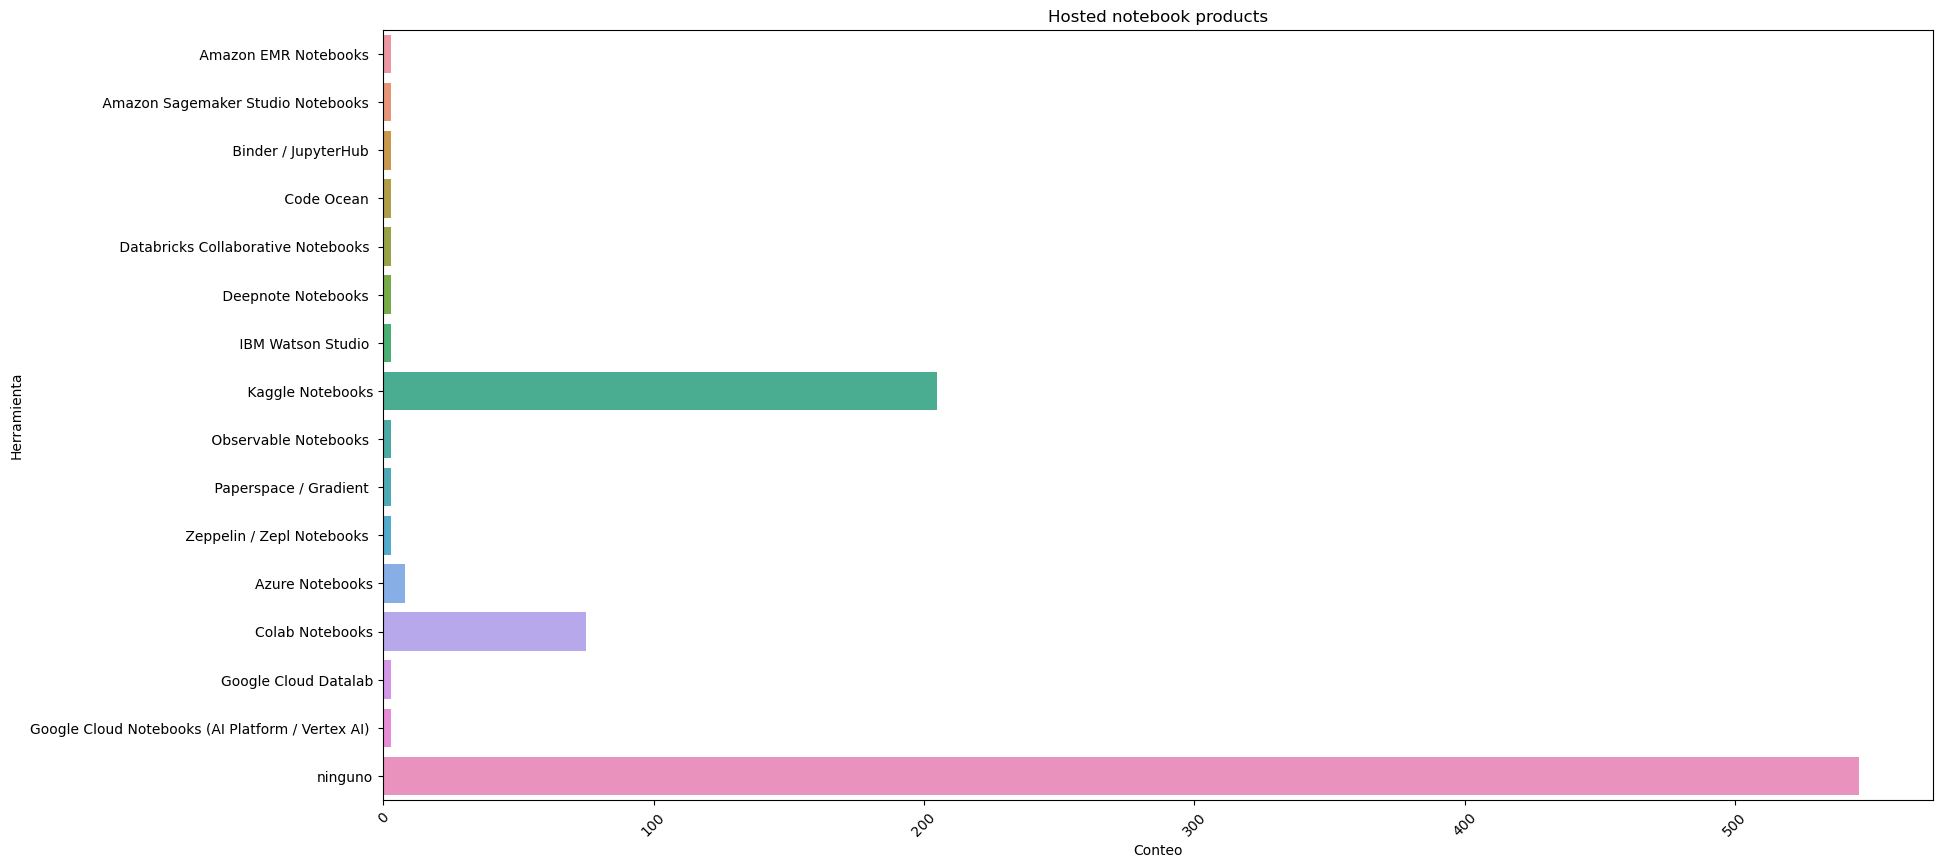

In [328]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.title('Hosted notebook products')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');

#los data analyst recomiendan kaggle como entorno colaborativo para ejecutar código

In [329]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [330]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [331]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [332]:
df_19_explode

,index,q19
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
779,746,None
780,747,None
781,748,None
782,749,None


In [333]:
df_19_explode['q19'].unique()

array([None, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [334]:
df_19_explode['q19'].unique()

array([None, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [335]:
df_19_explode=df_19_explode.fillna('ninguno')

In [336]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

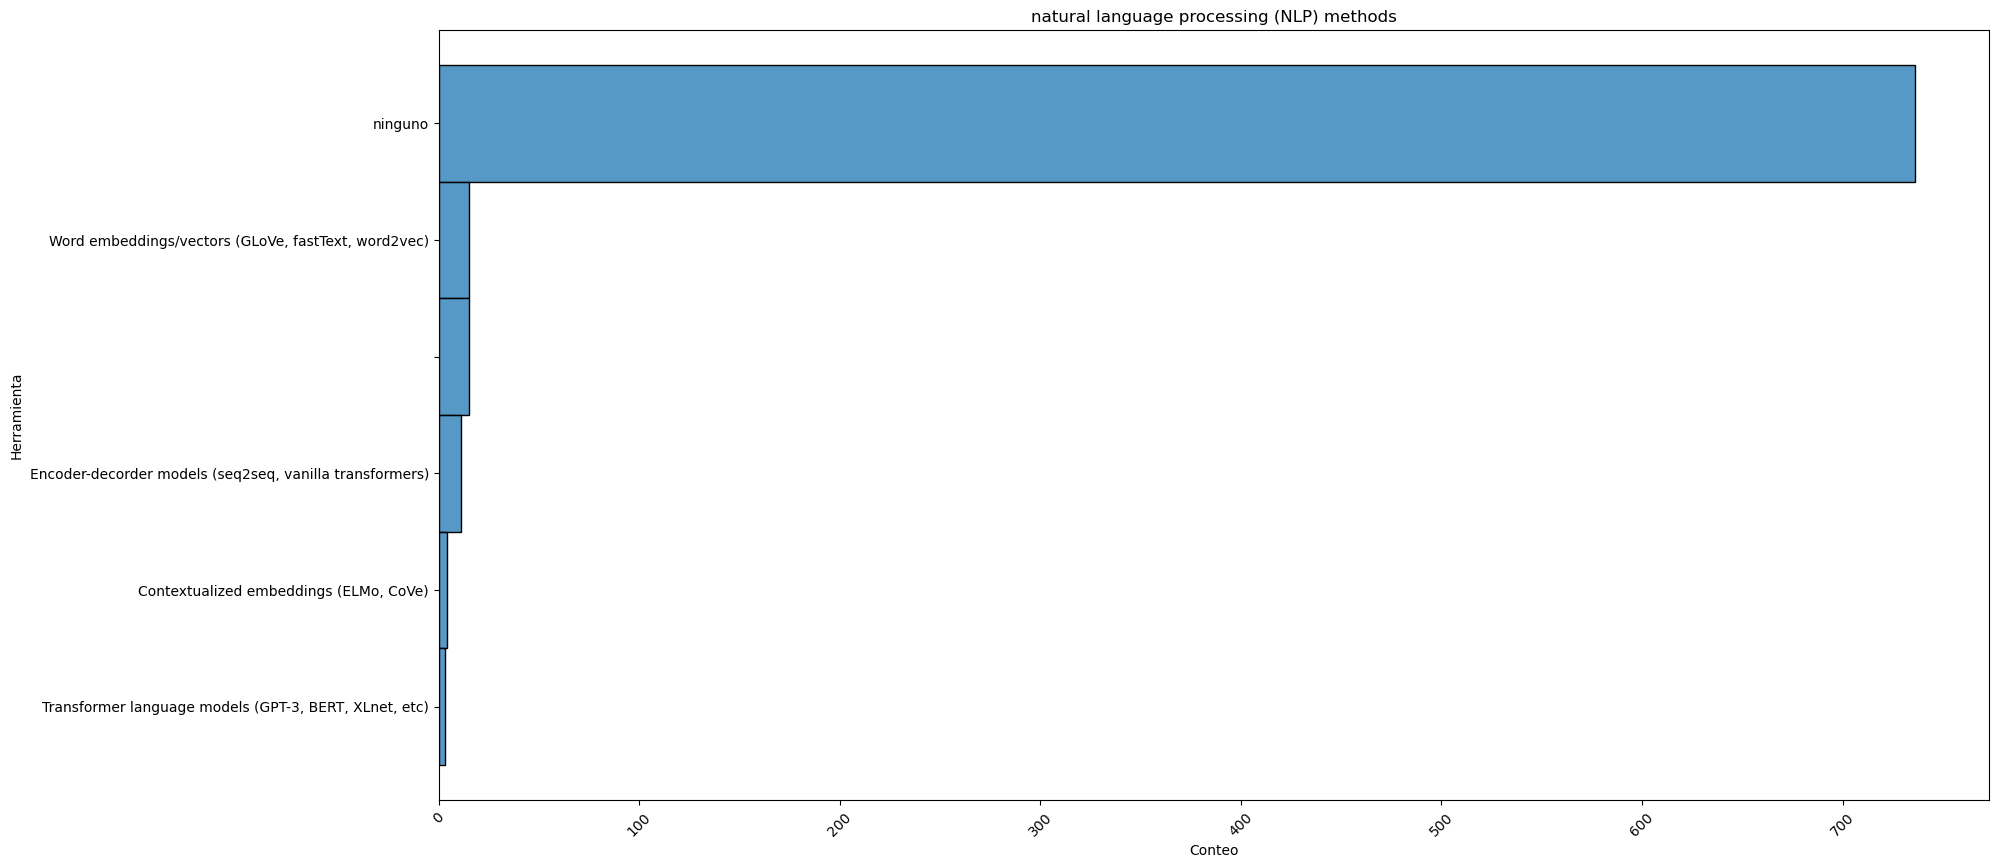

In [337]:
plt.figure(figsize=(20,10))
fig=sns.histplot(y = 'q19', data = df_19_explode)
plt.title('natural language processing (NLP) methods')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');

In [338]:
gb_19

q19
                                                            15
Contextualized embeddings (ELMo, CoVe)                       4
Encoder-decorder models (seq2seq, vanilla transformers)     11
Transformer language models (GPT-3, BERT, XLnet, etc)        3
Word embeddings/vectors (GLoVe, fastText, word2vec)         15
ninguno                                                    736
dtype: int64

In [339]:
df_q19 = gb_19.reset_index(name = 'count')

In [340]:
df_q19.drop(0, axis = 0,inplace = True)

In [341]:
df_q19

,q19,count
1,"Contextualized embeddings (ELMo, CoVe)",4
2,"Encoder-decorder models (seq2seq, vanilla tran...",11
3,"Transformer language models (GPT-3, BERT, XLne...",3
4,"Word embeddings/vectors (GLoVe, fastText, word...",15
5,ninguno,736


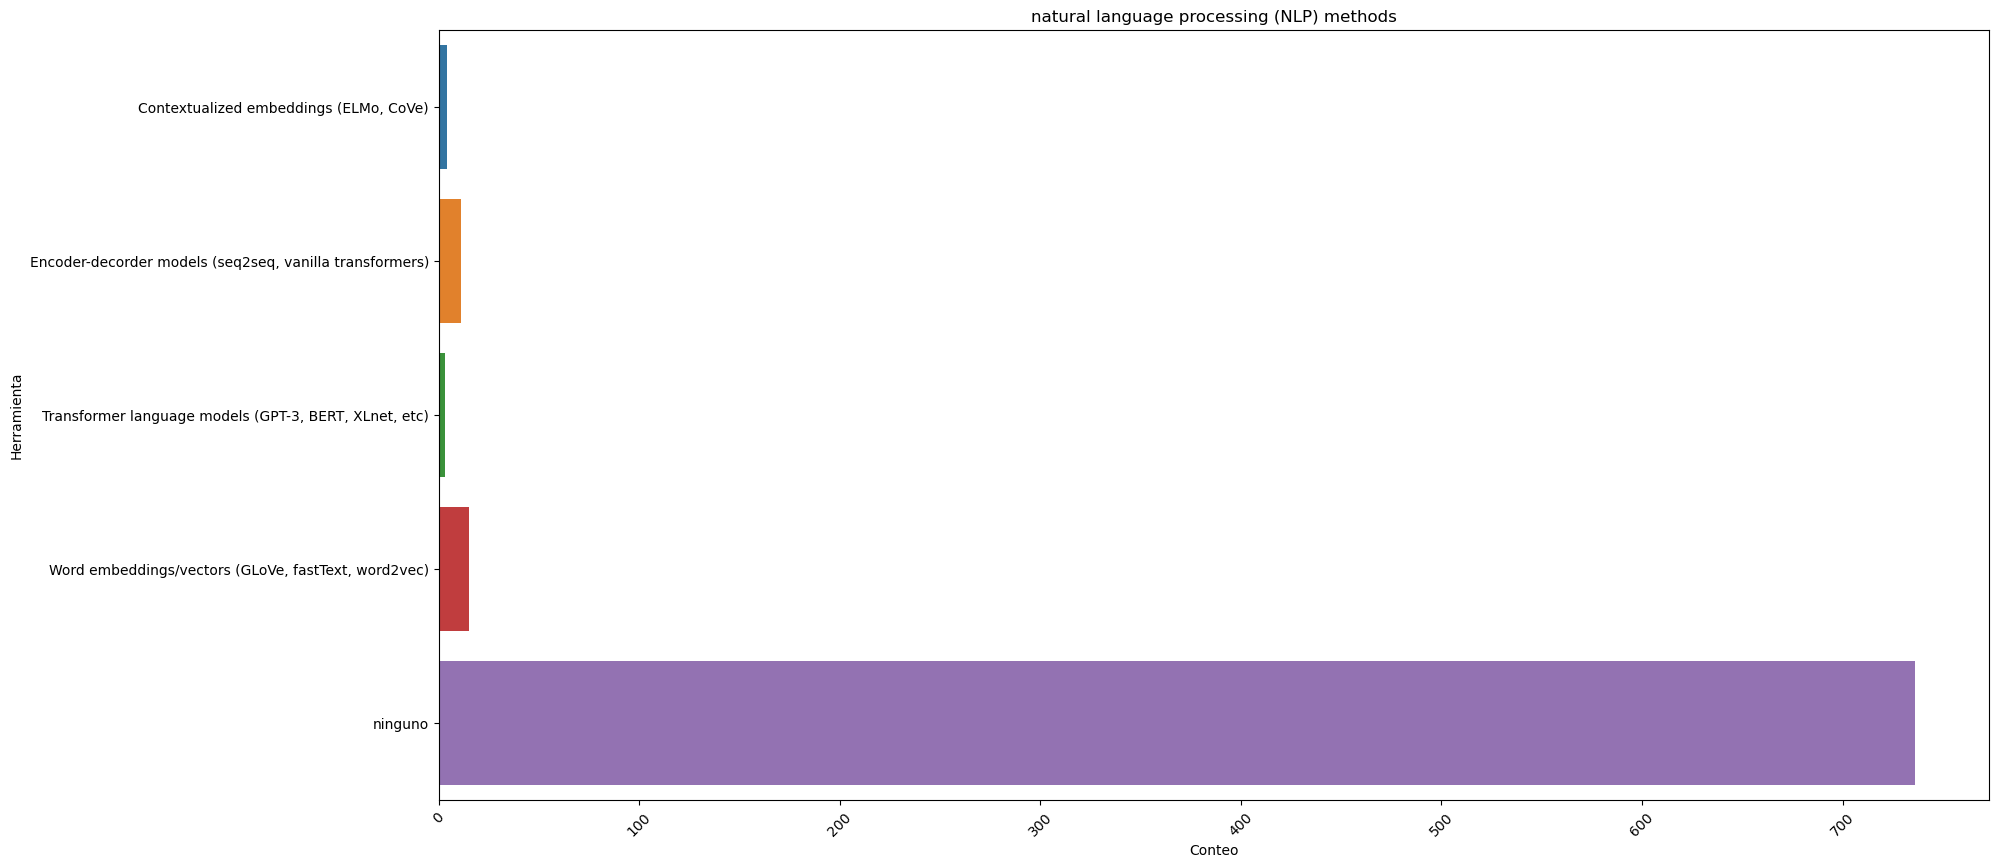

In [342]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x='count', y = 'q19', data = df_q19)
plt.title('natural language processing (NLP) methods')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');


In [343]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [344]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [345]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [346]:
df_27_explode

,index,q27
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
851,746,None
852,747,None
853,748,None
854,749,None


In [347]:
df_27_explode=df_27_explode.fillna('ninguno')

In [348]:
df_27_explode['q27'].unique()

array(['ninguno', ' Amazon Web Services (AWS) ', ' Microsoft Azure ',
       ' Google Cloud Platform (GCP) ', '', ' IBM Cloud / Red Hat '],
      dtype=object)

In [349]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [350]:
df_q27 = gb_27.reset_index(name = 'count')

In [351]:
df_q27.drop(0, axis = 0,inplace = True)

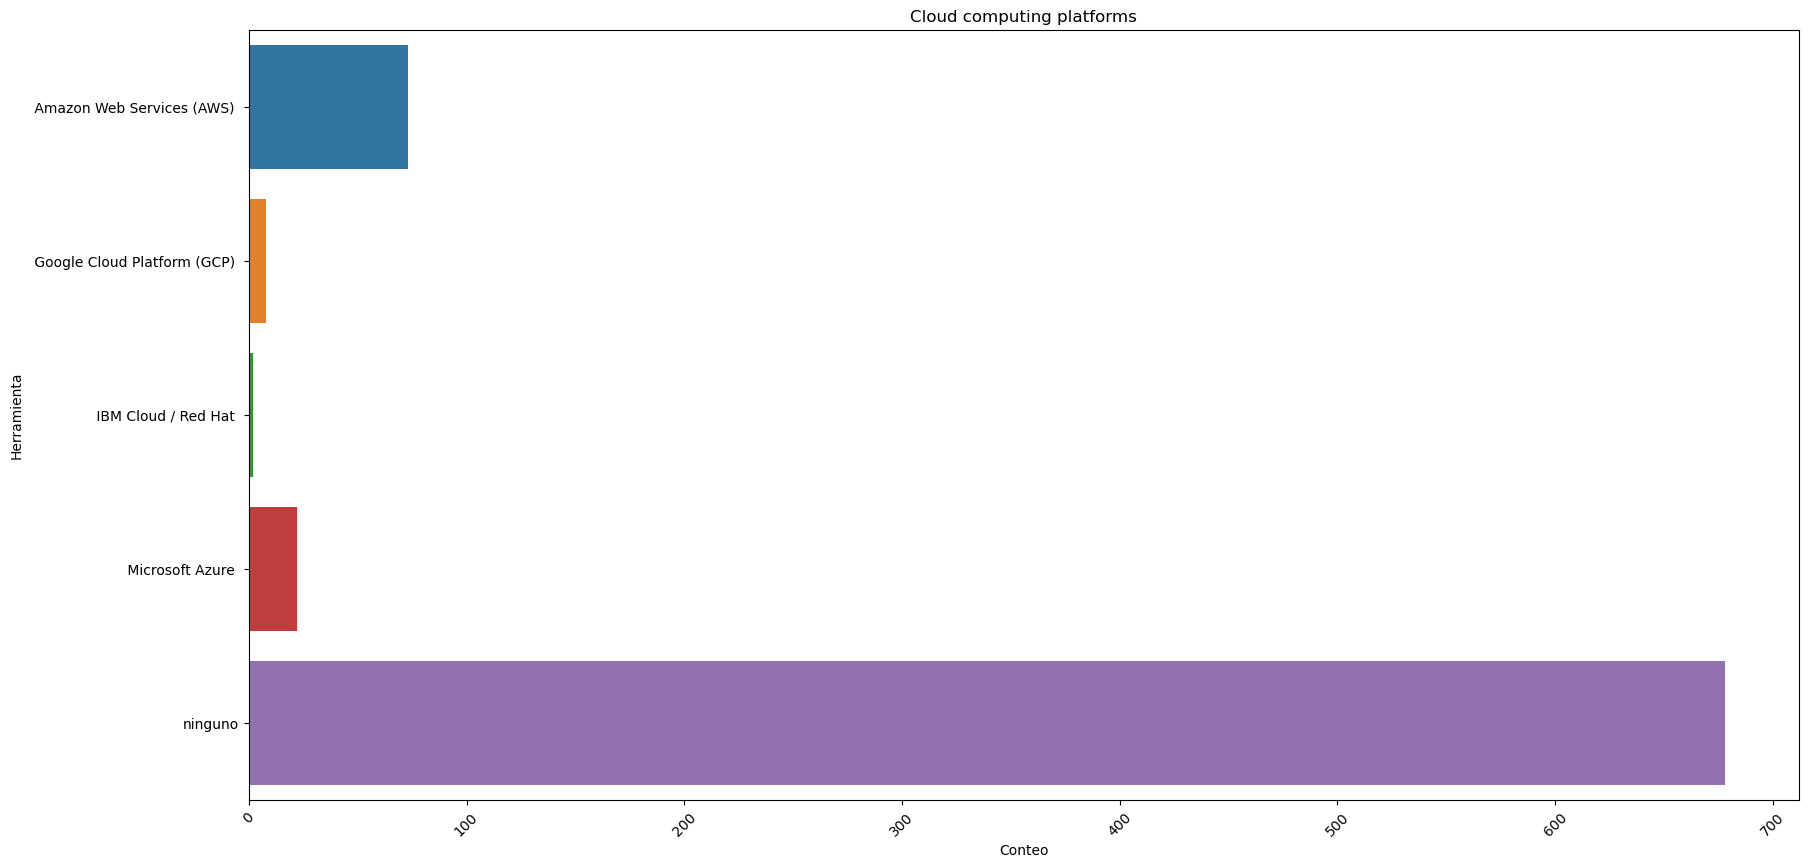

In [352]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.title('Cloud computing platforms')
fig.set(ylabel='Herramienta', xlabel= 'Conteo')
plt.xticks(rotation = 45);



# Q29

In [353]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [354]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [355]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
786,746,None
787,747,None
788,748,None
789,749,None


In [356]:
df_29_explode=df_29_explode.fillna('ninguno')

In [357]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                         31
 Amazon Elastic Compute Cloud (EC2)      31
 Google Cloud Compute Engine              2
 Microsoft Azure Virtual Machines         7
ninguno                                 720
dtype: int64

In [358]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,31
1,Amazon Elastic Compute Cloud (EC2),31
2,Google Cloud Compute Engine,2
3,Microsoft Azure Virtual Machines,7
4,ninguno,720


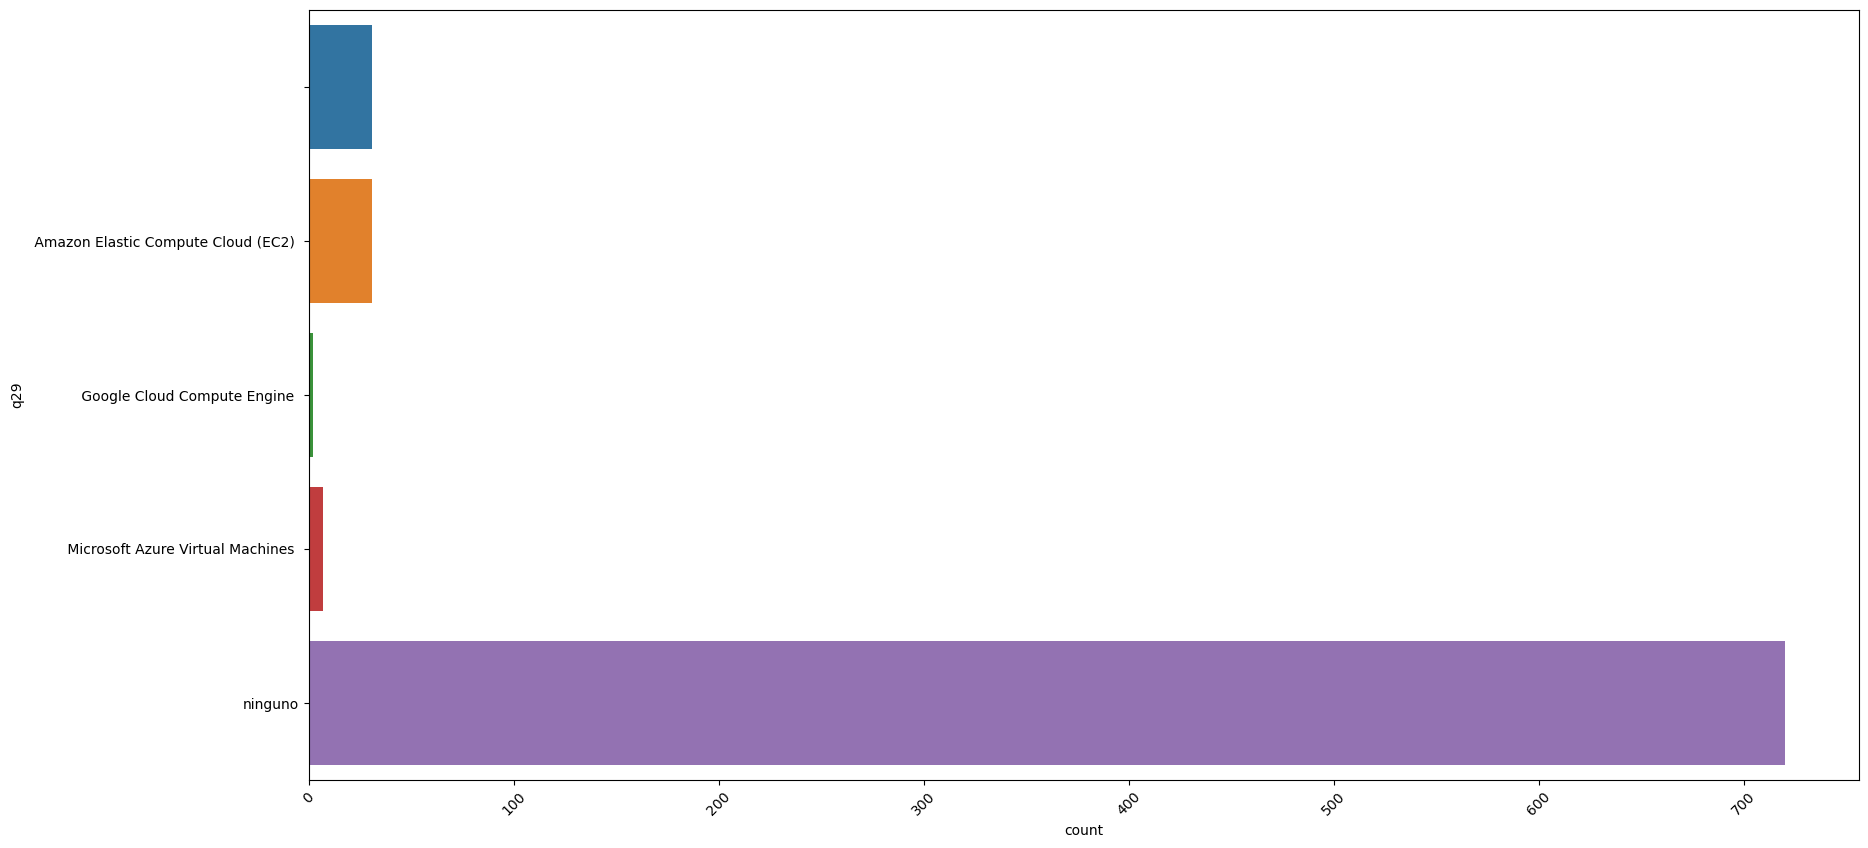

In [359]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [360]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [361]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [362]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
786,746,None
787,747,None
788,748,None
789,749,None


In [363]:
df_30_explode=df_30_explode.fillna('ninguno')

In [364]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                          25
 Amazon Elastic File System (EFS)          1
 Amazon Simple Storage Service (S3)        2
Google Cloud Storage (GCS)                 1
Microsoft Azure Data Lake Storage         25
Microsoft Azure Disk Storage              11
ninguno                                  726
dtype: int64

In [365]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,25
1,Amazon Elastic File System (EFS),1
2,Amazon Simple Storage Service (S3),2
3,Google Cloud Storage (GCS),1
4,Microsoft Azure Data Lake Storage,25
5,Microsoft Azure Disk Storage,11
6,ninguno,726


In [366]:
df_30_gp.drop(0, axis= 0,inplace=True)

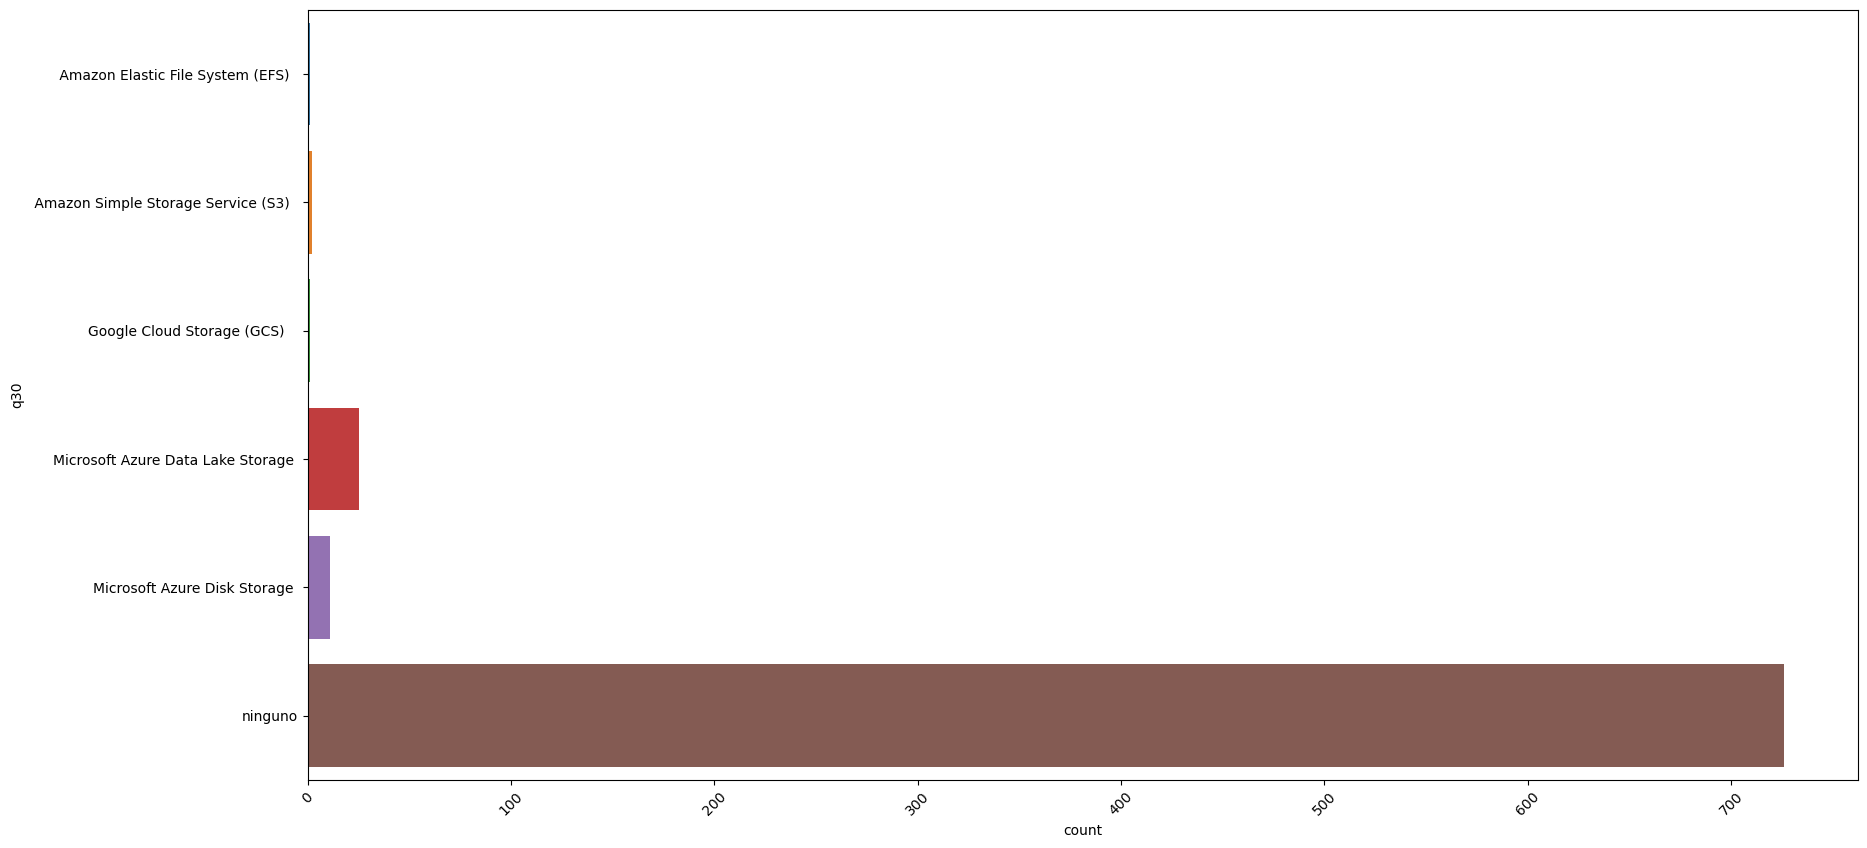

In [367]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [368]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [369]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [370]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
764,746,None
765,747,None
766,748,None
767,749,None


In [371]:
df_31_explode=df_31_explode.fillna('ninguno')

In [372]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                    16
 Amazon SageMaker                   16
 Azure Machine Learning Studio       2
ninguno                            735
dtype: int64

In [373]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Amazon SageMaker,16
2,Azure Machine Learning Studio,2
3,ninguno,735


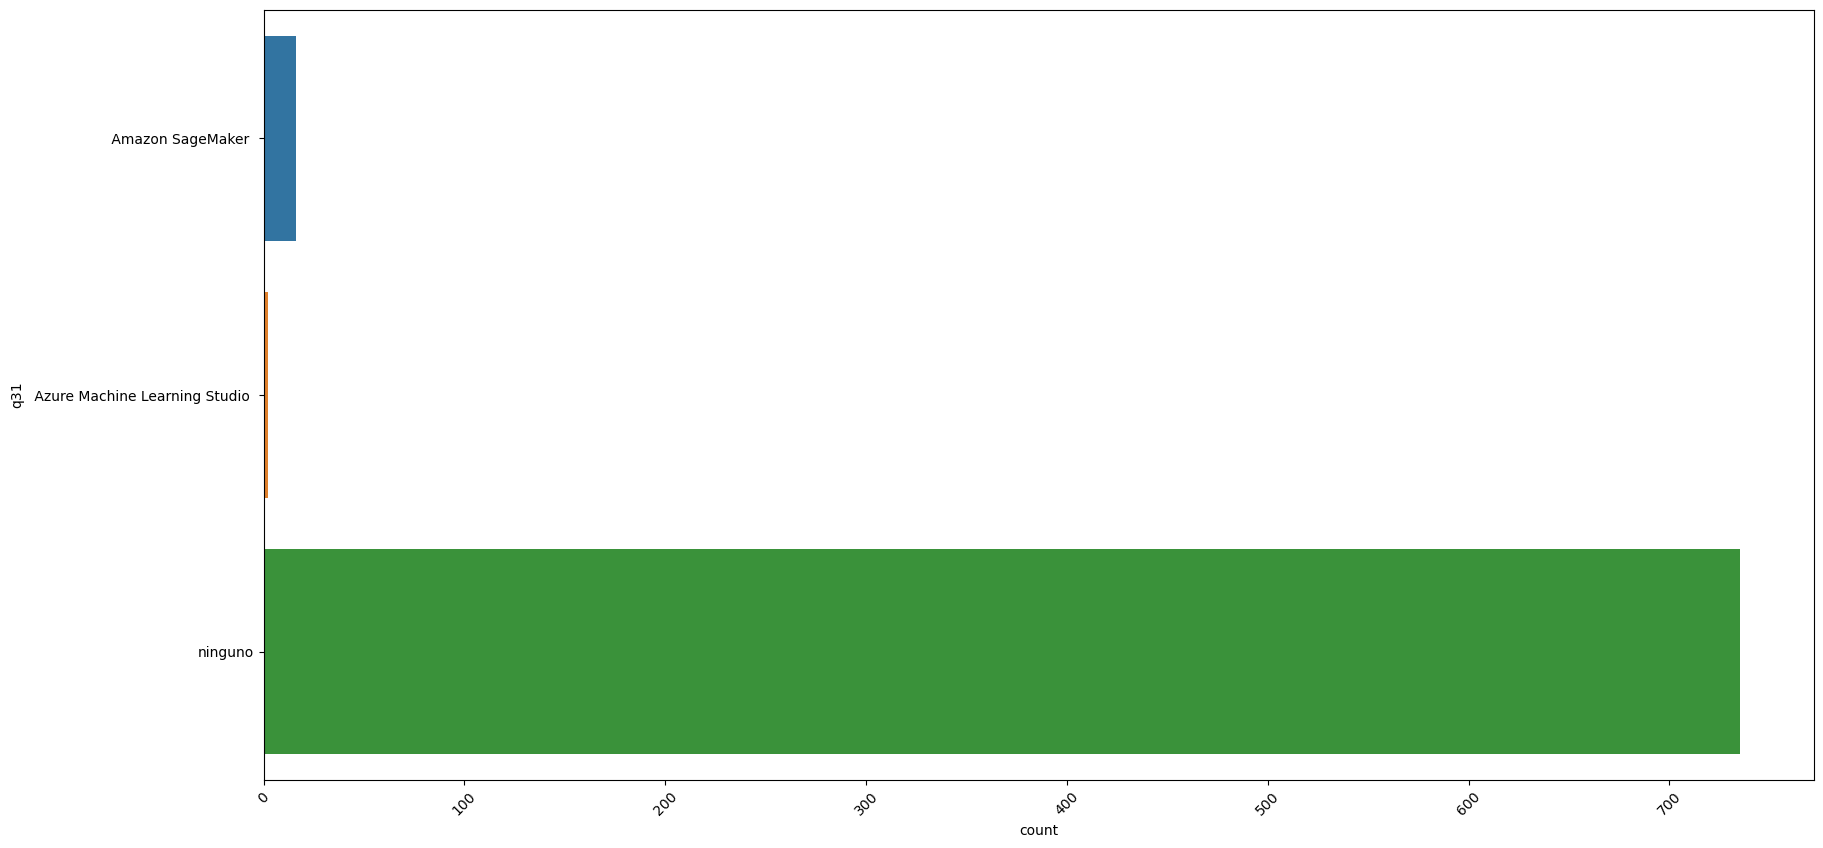

In [374]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# q33
    Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?
    Question 33 (which specific product) was only asked to respondents that selected more than one choice
for Question 32-A (which of the following products)

In [375]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [376]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [377]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [378]:
df_q33_explode['q33'].unique()

array([None, 'Google Cloud BigQuery ', 'Microsoft Azure SQL Database ',
       'Microsoft SQL Server ', 'MySQL ', 'SQLite ', 'Google Cloud SQL ',
       'MongoDB ', 'Google Cloud Spanner ', 'Oracle Database ',
       'Microsoft Azure Cosmos DB ', 'Google Cloud Firestore ',
       'Google Cloud BigTable ', 'PostgreSQL ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'IBM Db2 '], dtype=object)

In [379]:
df_q33_explode=df_q33_explode.fillna('ninguno')

In [380]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [381]:
df_q33 = gb_q33.reset_index(name='count')

In [382]:
df_q33

,q33,count
0,Amazon DynamoDB,1
1,Amazon Redshift,1
2,Google Cloud BigQuery,16
3,Google Cloud BigTable,2
4,Google Cloud Firestore,3
5,Google Cloud SQL,5
6,Google Cloud Spanner,2
7,IBM Db2,1
8,Microsoft Azure Cosmos DB,3
9,Microsoft Azure SQL Database,6


In [383]:
df_q33.drop(0, axis= 0,inplace=True)

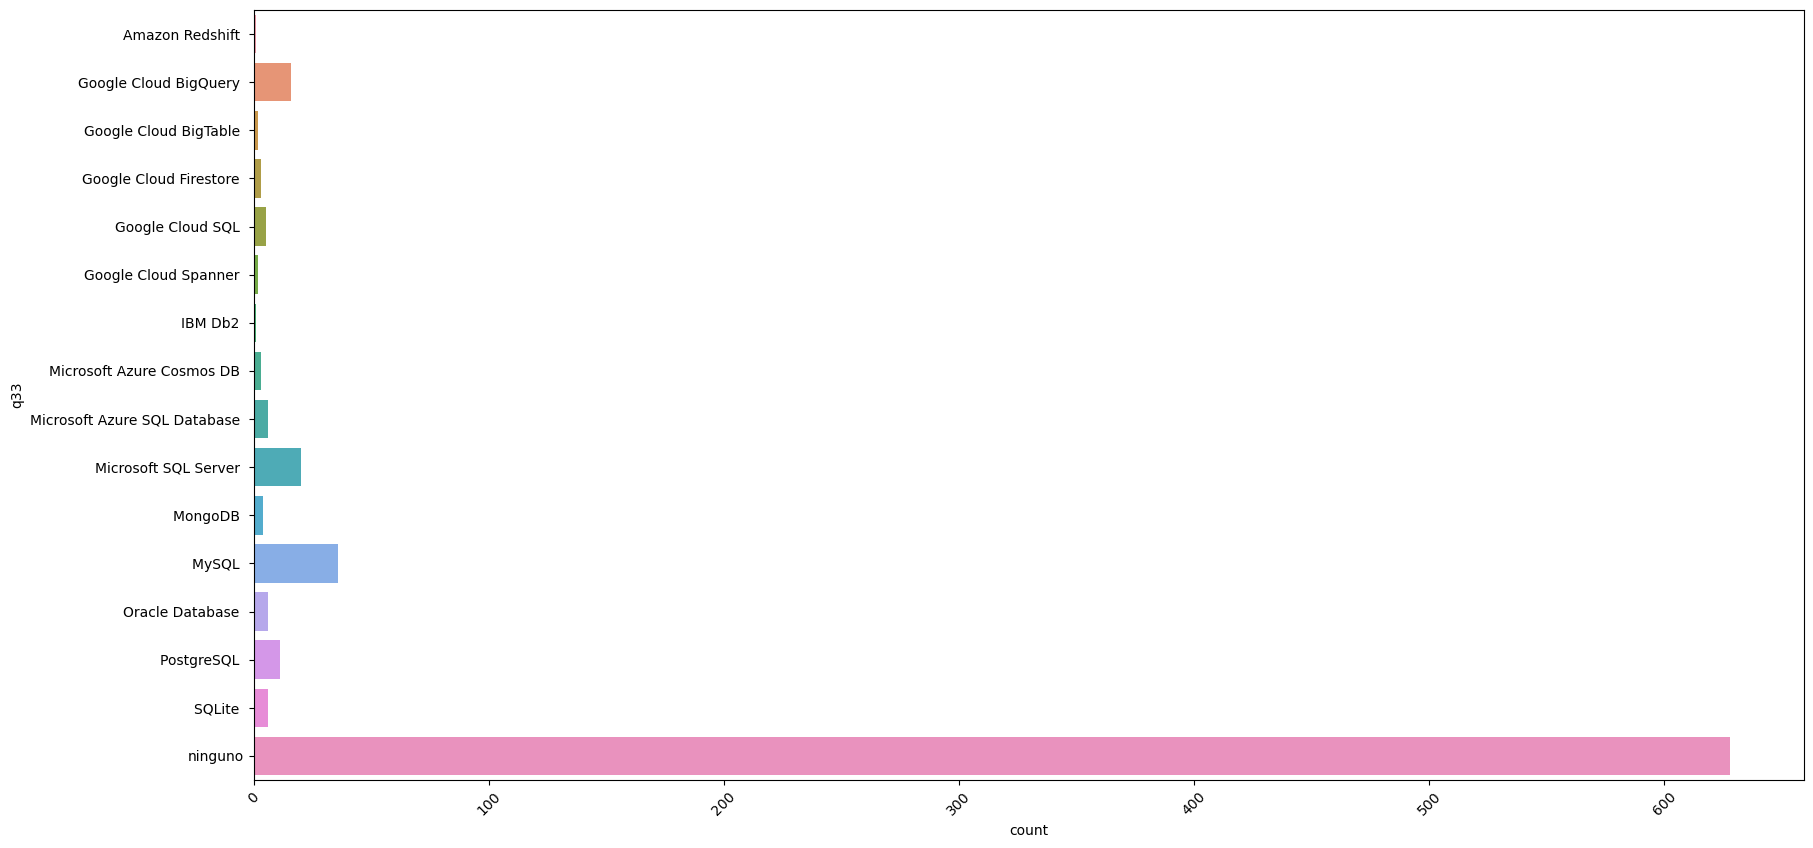

In [384]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.xticks(rotation = 45);

# q36
- Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [385]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [386]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [387]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [388]:
df_q36_explode=df_q36_explode.fillna('ninguno')

In [389]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [390]:
df_q36 = gb_q36.reset_index(name='count')

In [391]:
df_q36

,q36,count
0,,26
1,"Automated data augmentation (e.g. imgaug, albu...",26
2,Automated feature engineering/selection (e.g. ...,5
3,Automated hyperparameter tuning (e.g. hyperopt...,1
4,Automated model architecture searches (e.g. da...,1
5,"Automated model selection (e.g. auto-sklearn, ...",1
6,Automation of full ML pipelines (e.g. Google A...,1
7,ninguno,725


In [392]:
df_q36.drop(0, axis= 0,inplace=True)

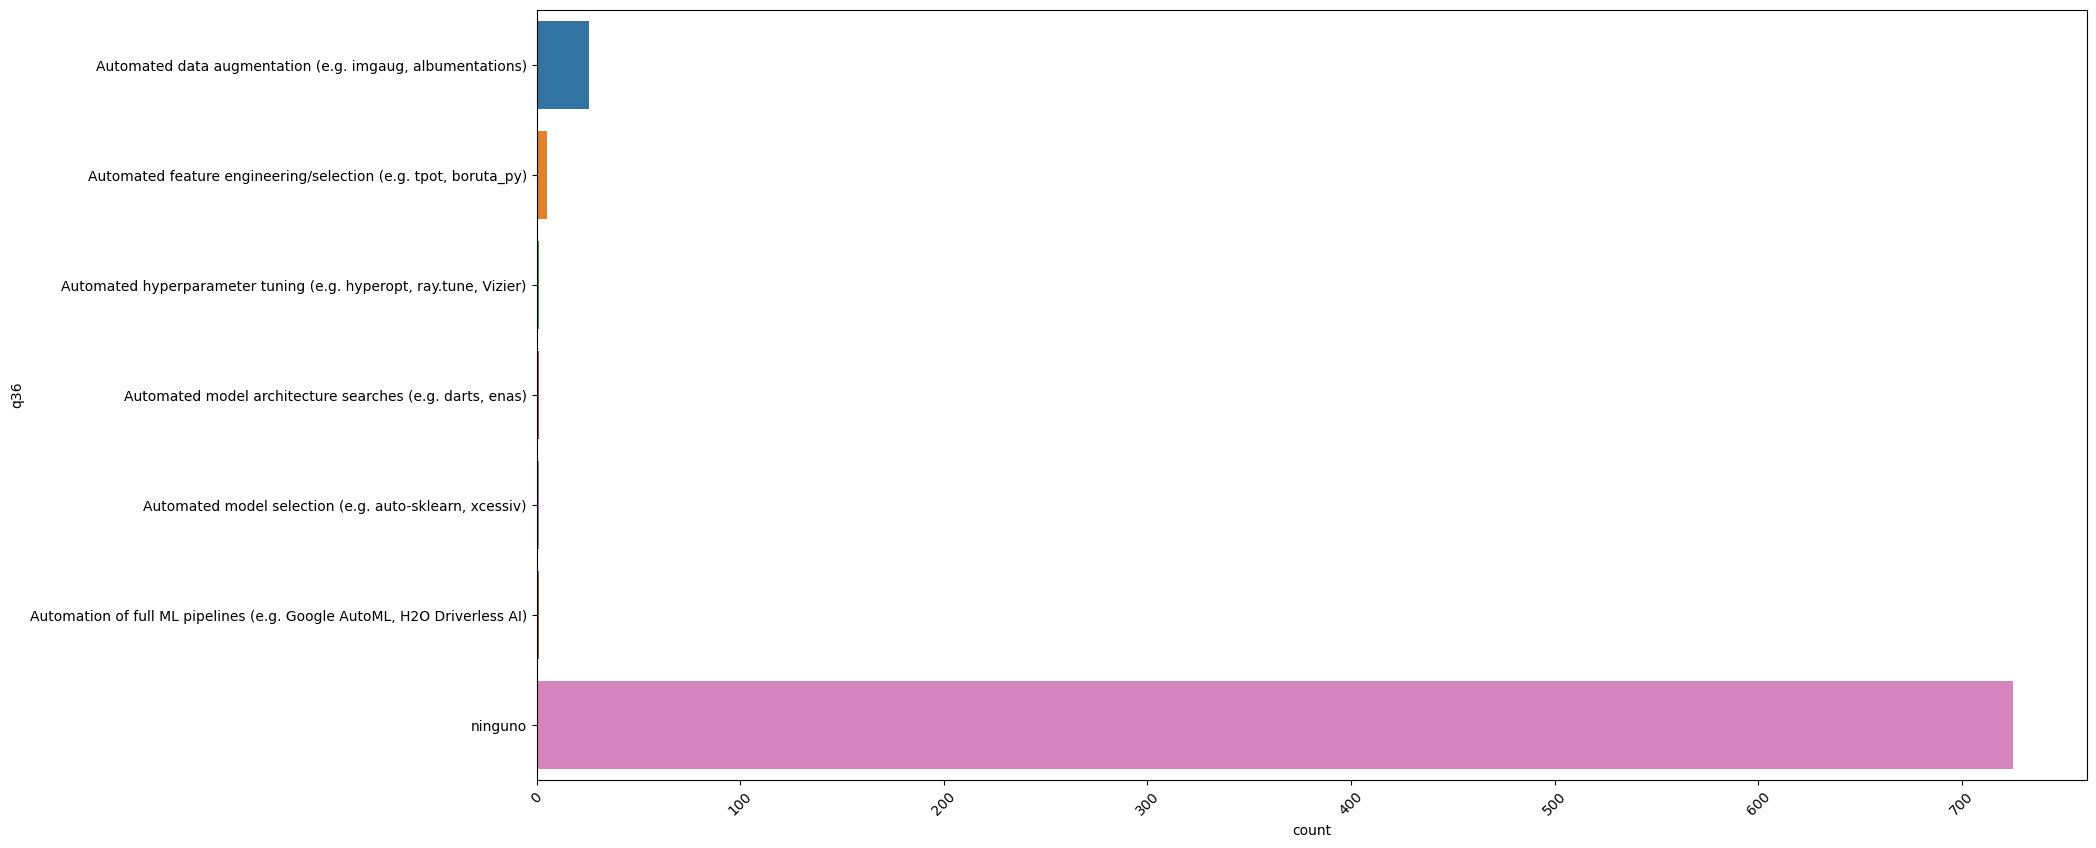

In [393]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.xticks(rotation = 45);

# q37
- Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply).

- Question 37-A (which specific product) was only asked to respondents that answered affirmatively to  Question 36-A (which of the following categories of products)

In [394]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [395]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [396]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [397]:
df_q37_explode=df_q37_explode.fillna('ninguno')

In [398]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [399]:
df_q37 = gb_q37.reset_index(name='count')

In [400]:
df_q37

,q37,count
0,,18
1,Google Cloud AutoML,18
2,ninguno,733


In [401]:
df_q37.drop(0, axis= 0,inplace=True)

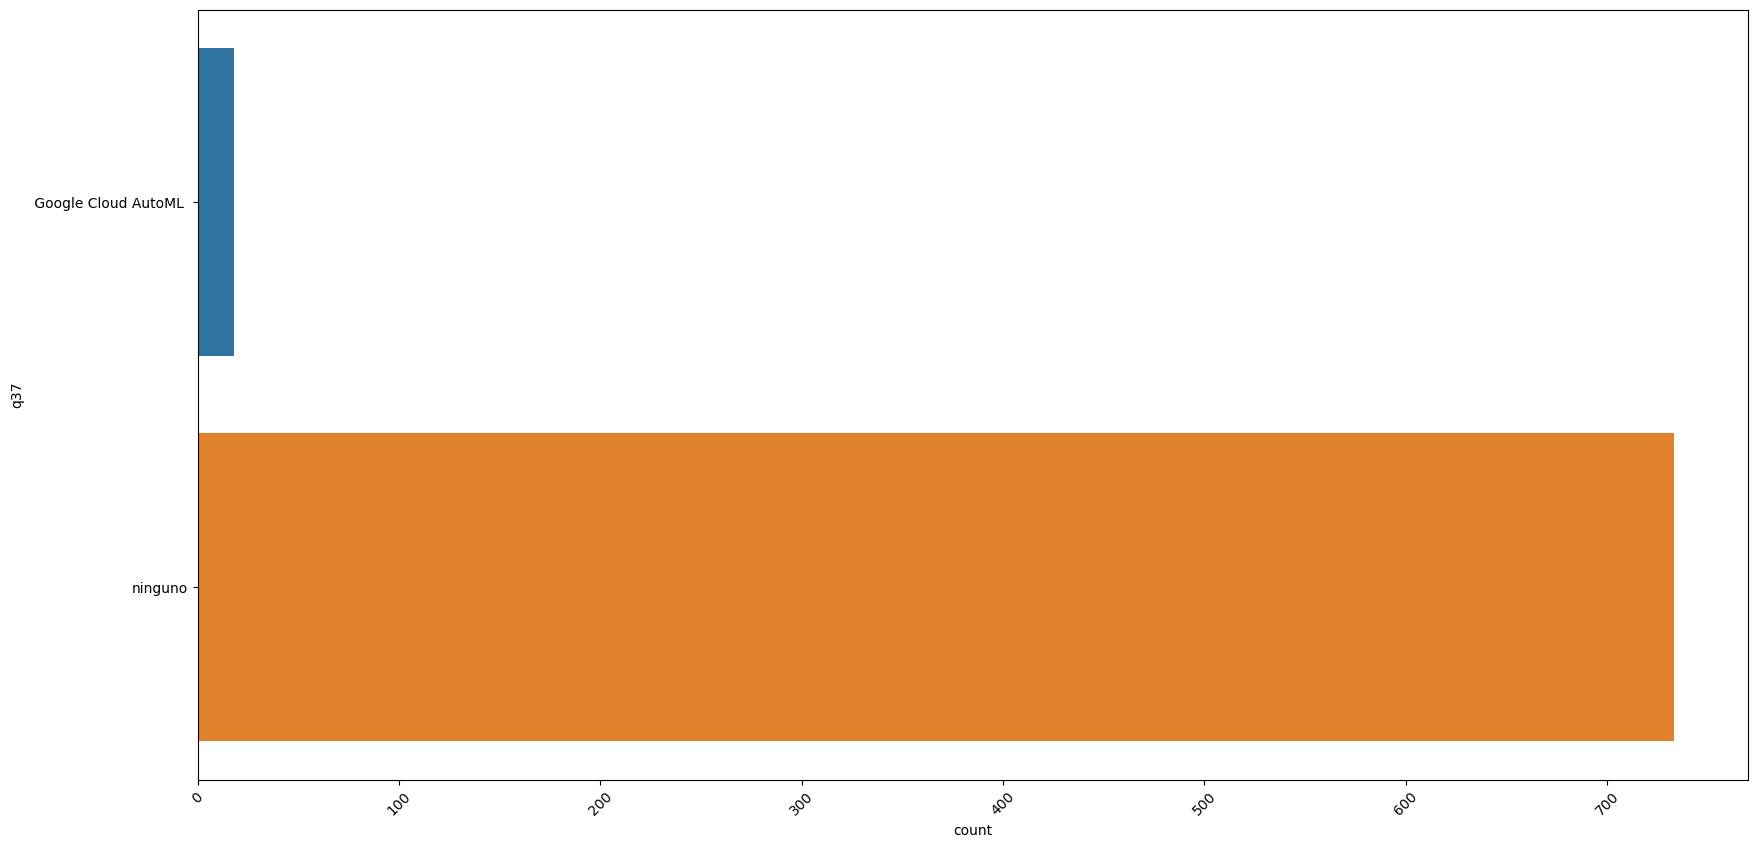

In [402]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.xticks(rotation = 45);

# q38
- Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [403]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [404]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [405]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [406]:
df_q38_explode=df_q38_explode.fillna('ninguno')

In [407]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [408]:
df_q38 = gb_q38.reset_index(name='count')

In [409]:
df_q38

,q38,count
0,,6
1,Neptune.ai,6
2,Weights & Biases,2
3,ninguno,745


In [410]:
df_q38.drop(0, axis= 0,inplace=True)

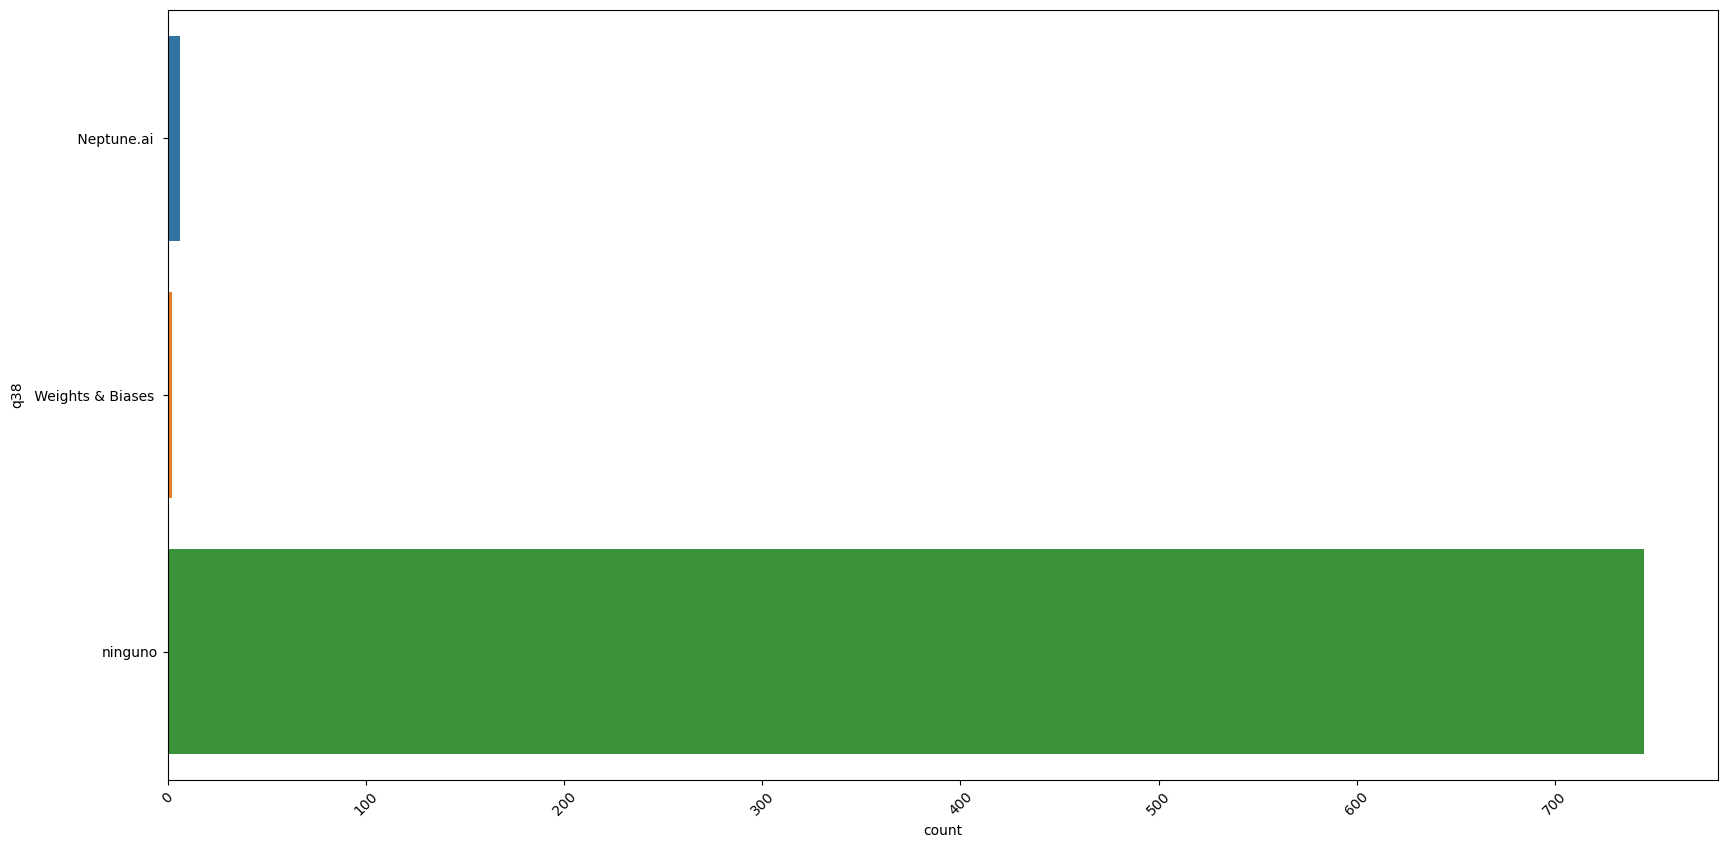

In [411]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.xticks(rotation = 45);

# q39

In [412]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [413]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [414]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [415]:
df_39_explode=df_39_explode.fillna('ninguno')

In [416]:
df_39_explode['q39'].unique()

array(['ninguno', ' Plotly Dash ', ''], dtype=object)

In [417]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [418]:
df_q39 = gb39.reset_index(name='count')

In [419]:
df_q39.drop(0, axis= 0,inplace=True)

In [420]:
df_q39

,q39,count
1,Plotly Dash,7
2,ninguno,744


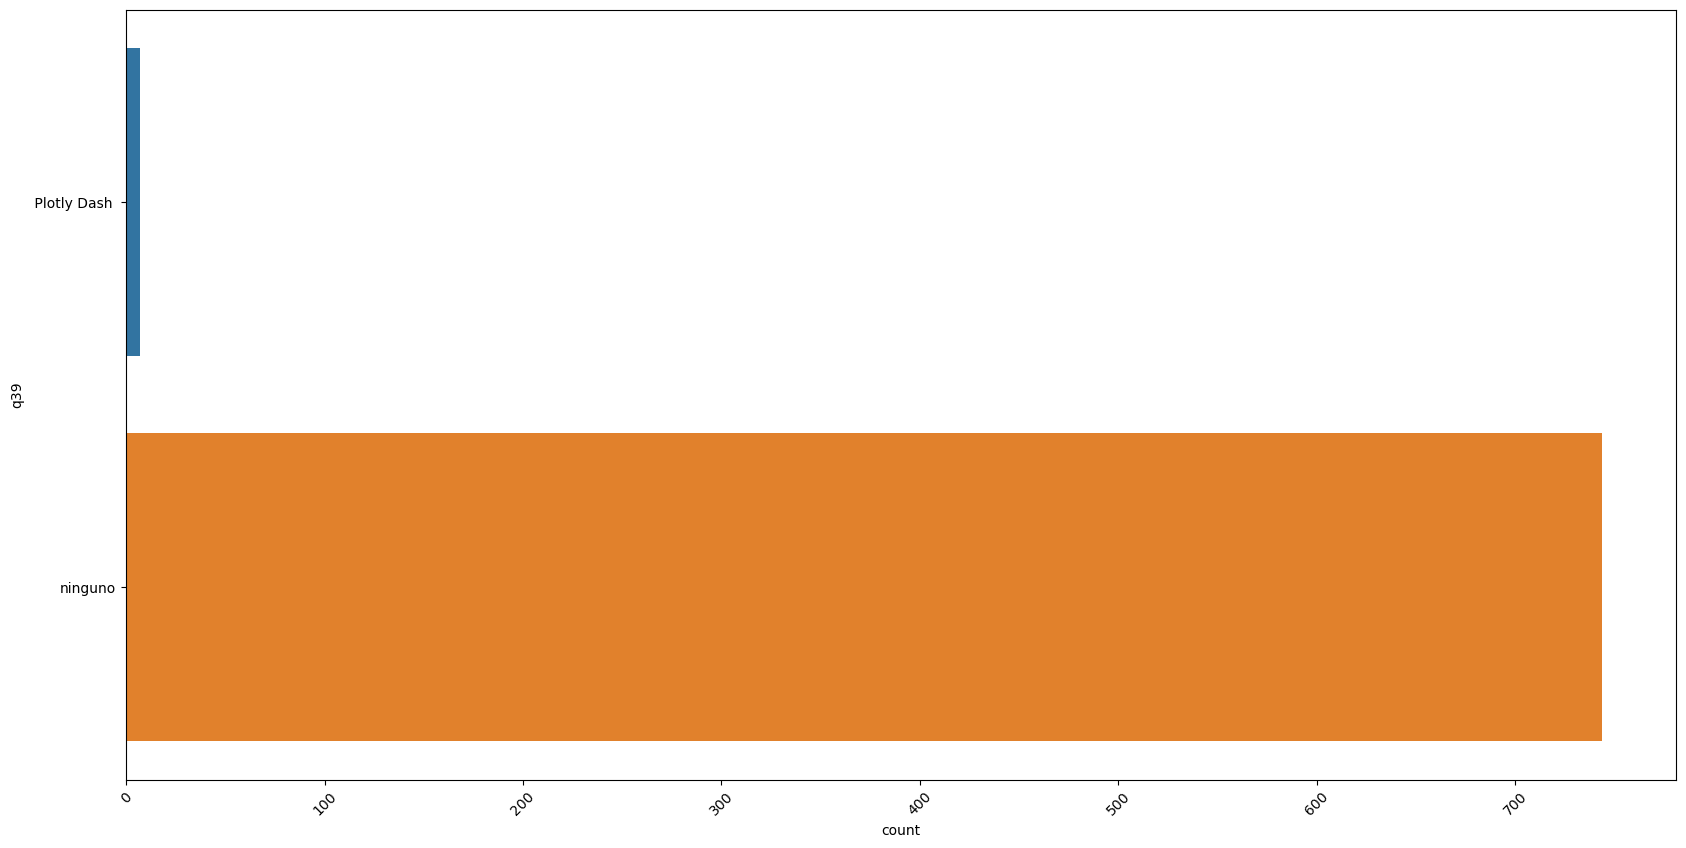

In [421]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [422]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,32,NaN
1,46,Coursera?edX?Kaggle Learn Courses?
2,66,NaN
3,102,Coursera?
4,108,Coursera?
...,...,...
746,25811,Coursera?
747,25819,Coursera?
748,25909,NaN
749,25916,Coursera?


In [423]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [424]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [425]:
df_40_explode=df_40_explode.fillna('ninguno')

In [426]:
df_40_explode['q40'].unique()

array(['ninguno', 'Coursera', 'edX', 'Kaggle Learn Courses', '',
       'DataCamp', 'Fast.ai', 'Udacity'], dtype=object)

In [427]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [428]:
df_q40 = gb40.reset_index(name='count')

In [429]:
df_q40.drop(0, axis= 0,inplace=True)

In [430]:
df_q40

,q40,count
1,Coursera,246
2,DataCamp,14
3,Fast.ai,1
4,Kaggle Learn Courses,32
5,Udacity,1
6,edX,57
7,ninguno,505


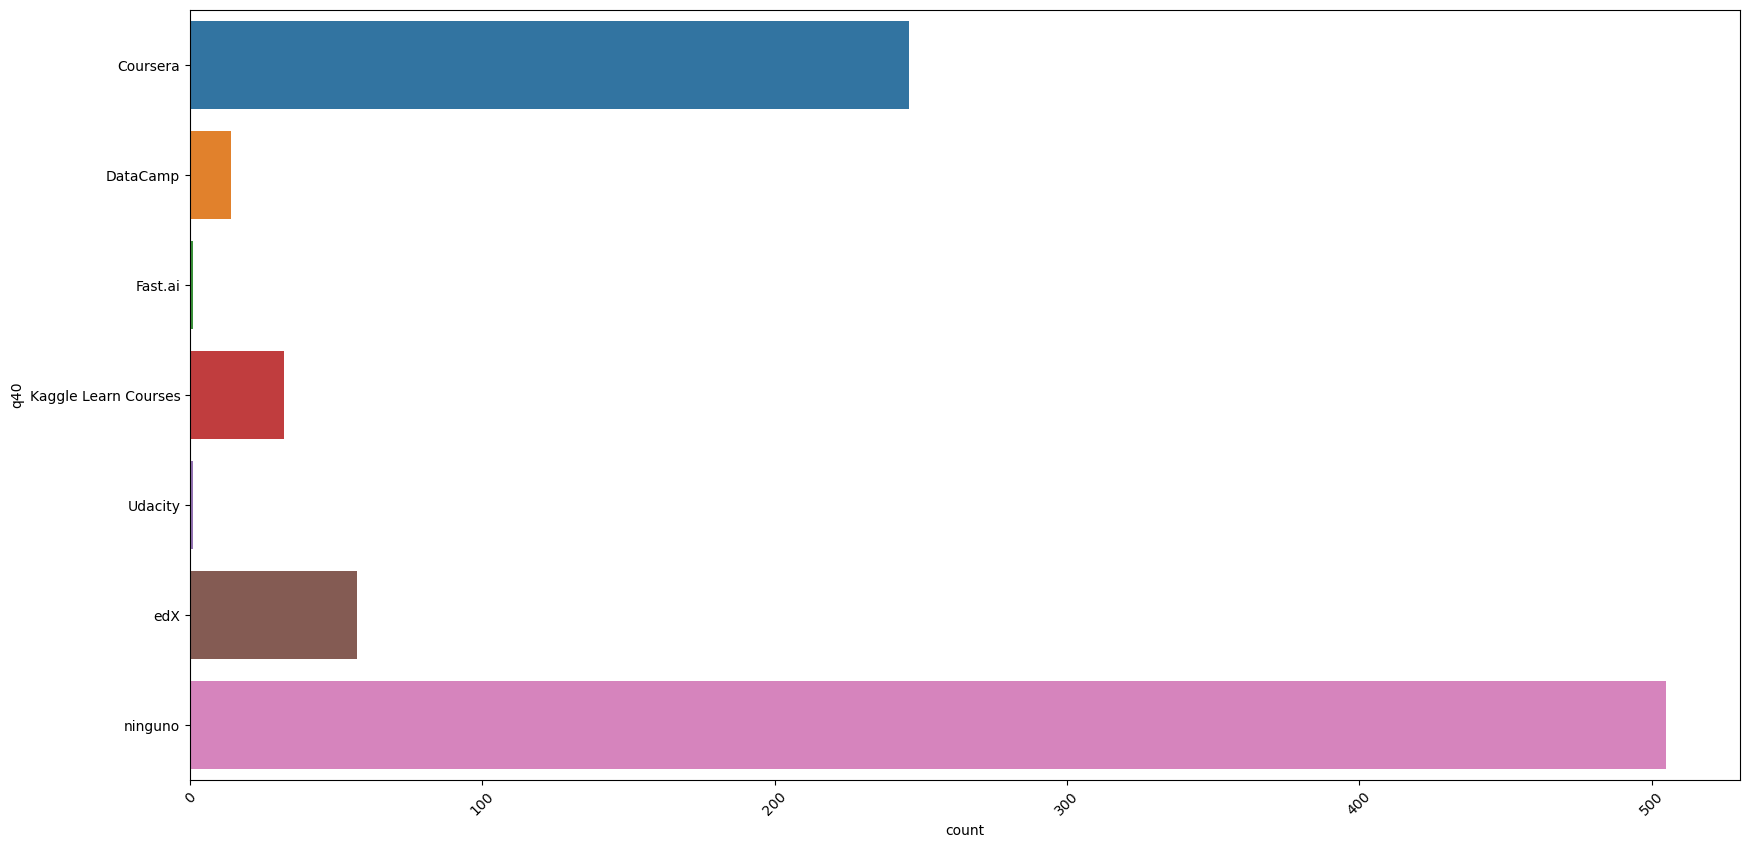

In [431]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [432]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,32,NaN
1,46,Twitter (data science influencers)?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,Twitter (data science influencers)?Email newsl...
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [433]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [434]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [435]:
df_42_explode=df_42_explode.fillna('ninguno')

In [436]:
df_42_explode['q42'].unique()

array(['ninguno', 'Twitter (data science influencers)', '',
       "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
       'Reddit (r/machinelearning, etc)',
       'Kaggle (notebooks, forums, etc)',
       'Course Forums (forums.fast.ai, Coursera forums, etc)',
       'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
       'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
       'Blogs (Towards Data Science, Analytics Vidhya, etc)',
       'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
       'Slack Communities (ods.ai, kagglenoobs, etc)'], dtype=object)

In [437]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [438]:
df_q42 = gb42.reset_index(name='count')

In [439]:
df_q42.drop(0, axis= 0,inplace=True)

In [440]:
df_q42

,q42,count
1,"Blogs (Towards Data Science, Analytics Vidhya,...",2
2,"Course Forums (forums.fast.ai, Coursera forums...",3
3,"Email newsletters (Data Elixir, O'Reilly Data ...",20
4,"Journal Publications (peer-reviewed journals, ...",1
5,"Kaggle (notebooks, forums, etc)",3
6,"Podcasts (Chai Time Data Science, O’Reilly Dat...",2
7,"Reddit (r/machinelearning, etc)",4
8,"Slack Communities (ods.ai, kagglenoobs, etc)",1
9,Twitter (data science influencers),81
10,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",3


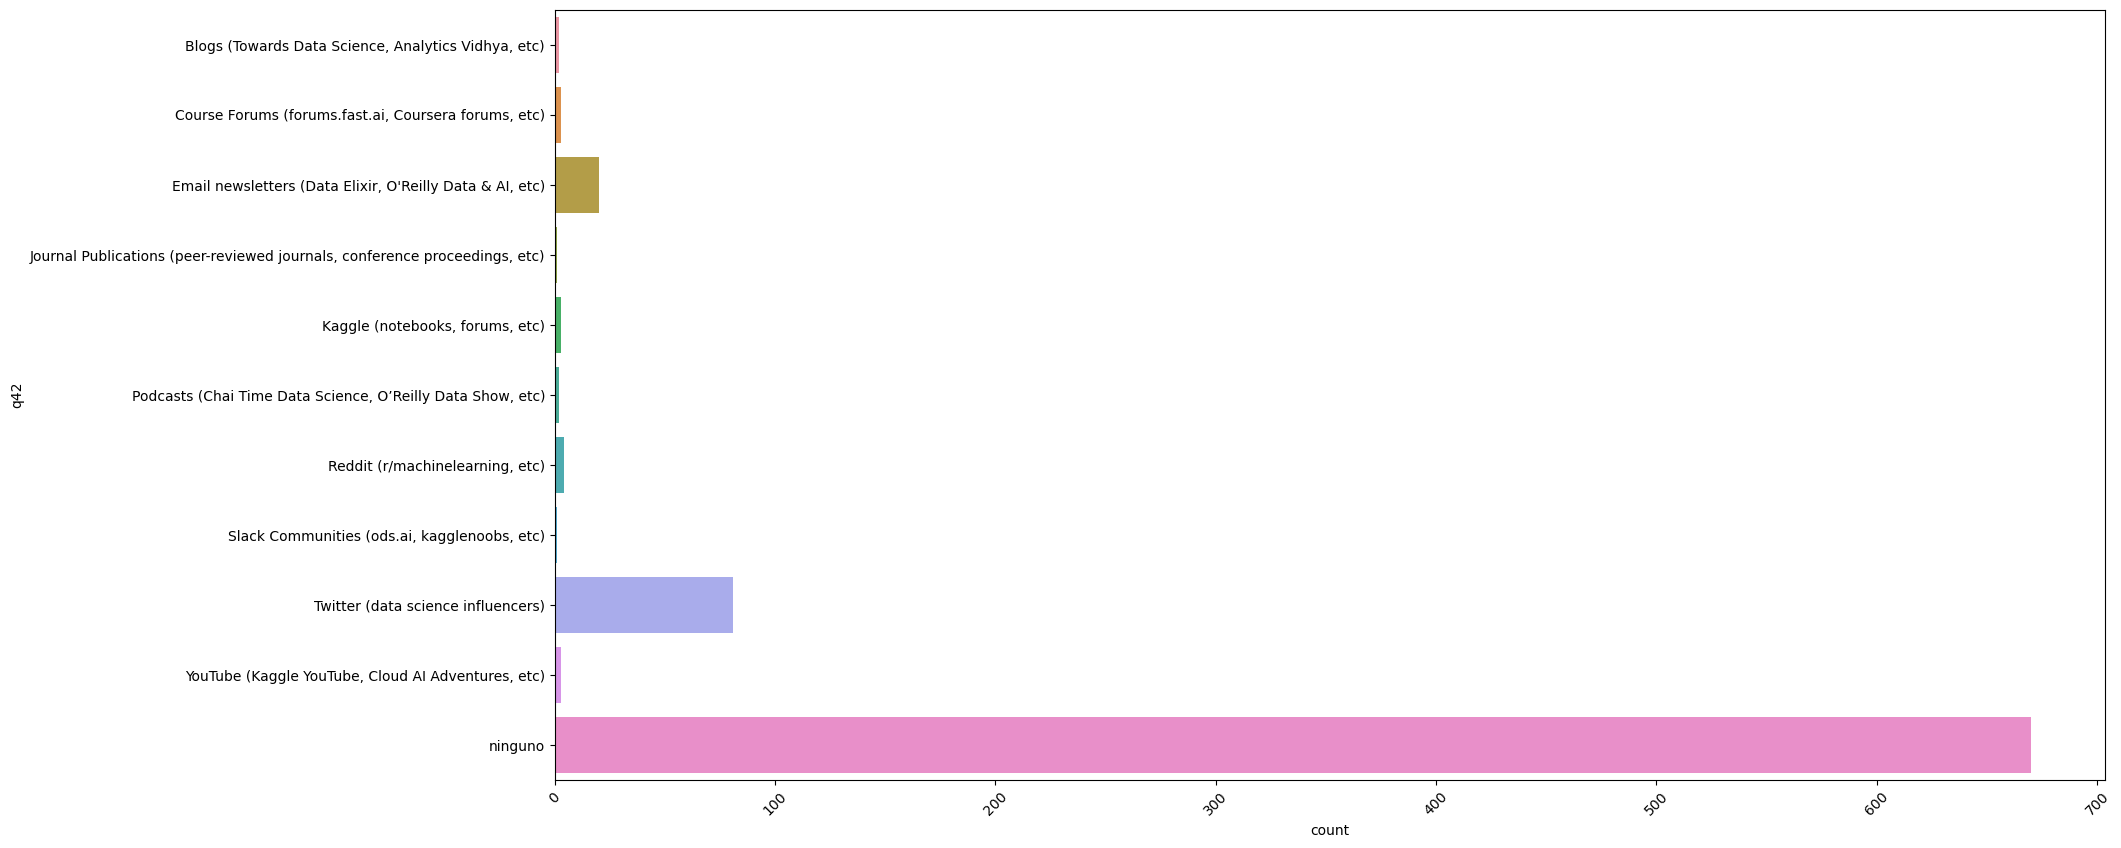

In [441]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);

 - q10:"notebook_products" 
 - q18:"vision_methods"
 - q19:"nlp"
 - q27:"cloud_platforms"
 - q29:"cloud_products"
 - q30:"data_storage_products"
 - q31:"ml_products"
 - q32:"bd_products"
 - q34:"bi_tools"
 - q36:"auto_ml"
 - q37:"aml_tools"
 - q38:"ml_experiment_tools"
 - q39:"share_app"
 - q40:"platform_courses_ds"
 - q42:"media_sources"


# Relación entre variables

In [442]:
df['q9'].apply(quitar_comillas_2)

32                                             [RStudio ]
46       [Jupyter  , PyCharm , MATLAB , Jupyter Notebook]
66                                    [PyCharm ,  Spyder]
102                         [Jupyter  , Jupyter Notebook]
108                            [Jupyter Notebook,  Other]
                               ...                       
25811          [PyCharm ,  Vim / Emacs, Jupyter Notebook]
25819                                    [Visual Studio ]
25909                                  [Jupyter Notebook]
25916                                  [Jupyter Notebook]
25954                                  [Jupyter Notebook]
Name: q9, Length: 751, dtype: object

In [443]:
df['q9'][46]

'Jupyter  ,PyCharm ,MATLAB ,Jupyter Notebook'

In [444]:
df['q9'][102]

'Jupyter  ,Jupyter Notebook'

Nuestro siguiente objetivo es componer un subplot con todas nuestras gráficas, las que nos dicen que no utilizan ninguna de las herramientas consultadas. 


In [445]:
lista_df = ["df_q10","df_q18","df_q19","df_q27", "df_q29", "df_q30", "df_q31", "df_q32", "df_q34", "df_q36", "df_q37", "df_q38", "df_q39", "df_q40", "df_q42"]

In [ ]:
df_none = {"q10":"notebook_products","q18":"vision_methods", "q19":"nlp", "q27":"cloud_platforms", 
"q29":"cloud_products", "q30":"data_storage_products", "q31":"ml_products", "q32":"bd_products", 
"q34":"bi_tools", "q36":"auto_ml", "q37":"aml_tools", "q38":"ml_experiment_tools", "q39":"share_app", 
"q40":"platform_courses_ds", "q42":"media_sources"} 

In [ ]:
q10,q19,q27,q29,q30,q31,q33,q36,q37,q38,q39,q40,q42 

ValueError: too many values to unpack (expected 2)

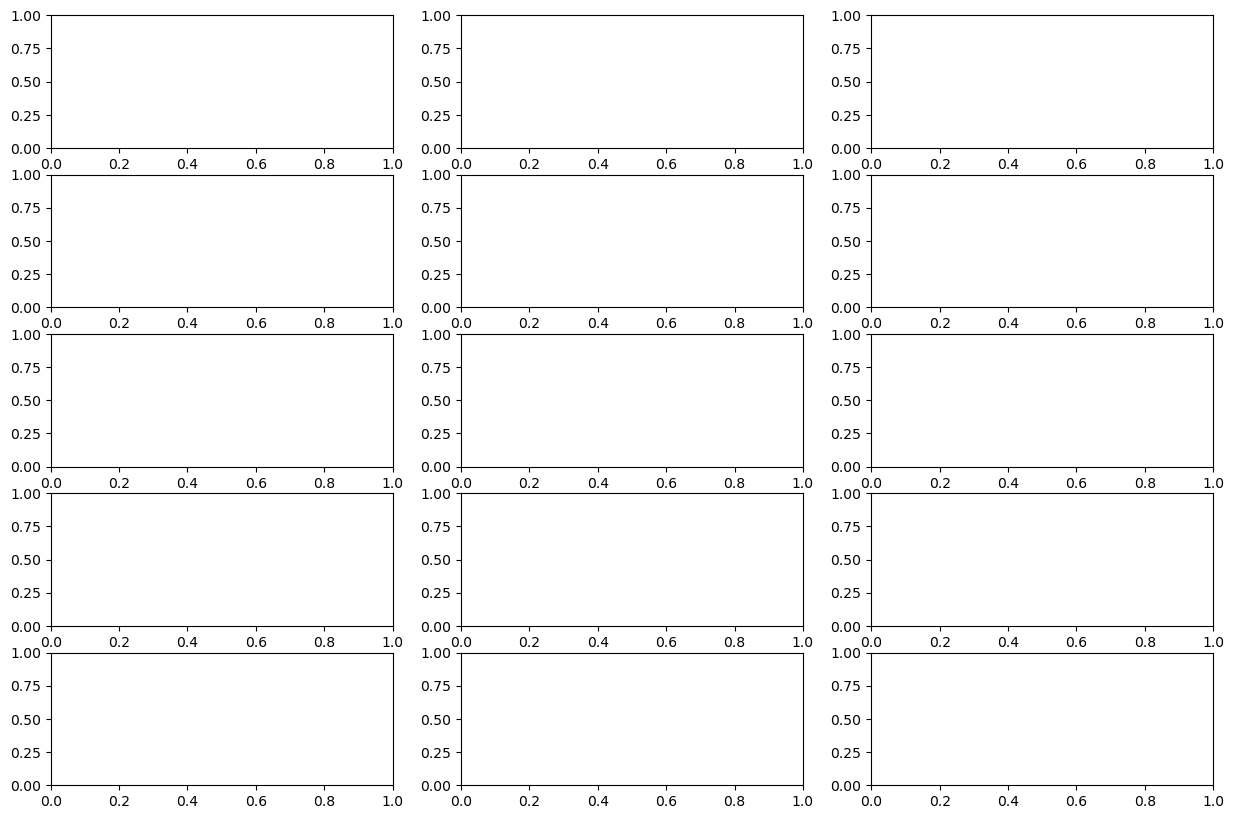

In [463]:
fig, axes = plt.subplots(nrows=5, ncols = 3, figsize = (15, 10))
axes = axes.flat


for i, col in enumerate(lista_df):
    for k, v in df_none:
        sns.barplot(data = col, x = "count", y = k, ax = axes[i])
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].set_title(col)

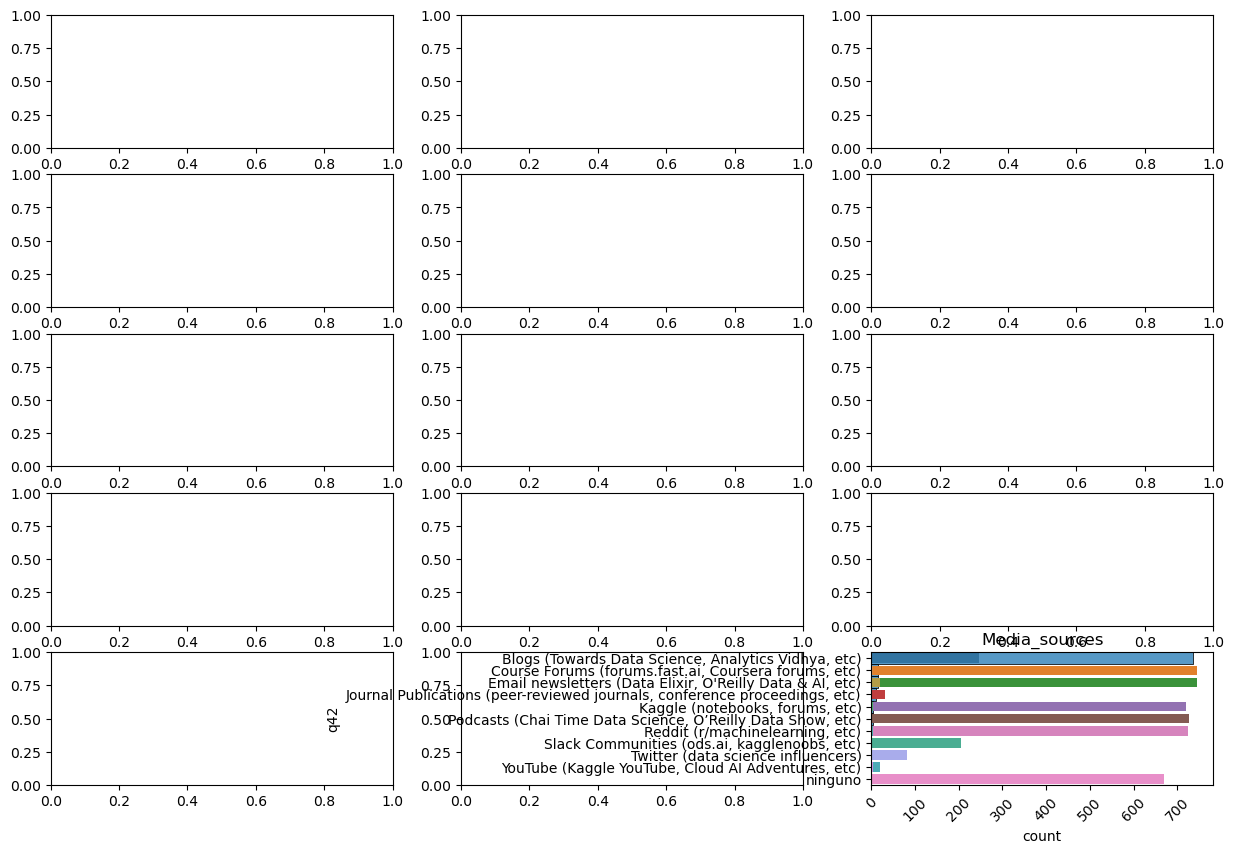

In [460]:
fig, axes = plt.subplots(nrows=5, ncols = 3, figsize = (15, 10))
#axes = axes.flat


axes[0][0] = sns.barplot(x ='count', y = 'q10', data=df_q10)
axes[0][0] = plt.title('Hosted notebook products')
#axes[0] = plt.xticks(rotation = 45)

axes[0][1] = sns.histplot(y = 'q19', data = df_19_explode)
axes[0][] = plt.title('natural language processing (NLP) methods')
#axes[1] = plt.xticks(rotation = 45)

axes[2] = sns.barplot(x ='count', y = 'q27', data = df_q27)
axes[2] = plt.title('Cloud computing platforms')
#axes[2] = plt.xticks(rotation = 45)

axes[3] = sns.barplot(x ='count', y = 'q29', data=df_29_gp)
axes[3] = plt.title("Cloud_products")
#axes[3] = plt.xticks(rotation = 45)

axes[4] = sns.barplot(x ='count', y = 'q30', data=df_30_gp)
axes[4] = plt.title("Data_storage_products")
#axes[4] = plt.xticks(rotation = 45)

axes[5] = sns.barplot(x ='count', y = 'q31', data=df_31_gp)
axes[5] = plt.title("ML_products")
#axes[5] = plt.xticks(rotation = 45)

axes[6] = sns.barplot(x ='count', y = 'q33', data=df_q33)
axes[6] = plt.title("Big Data products")
#axes[6] = plt.xticks(rotation = 45)

axes[7] = sns.barplot(x ='count', y = 'q36', data=df_q36)
axes[7] = plt.title("BI_tools")
#axes[7] = plt.xticks(rotation = 45)

axes[8] = sns.barplot(x ='count', y = 'q37', data=df_q37)
axes[8] = plt.title("Automated ML tools")
axes[8] = plt.xticks(rotation = 45)

axes[9] = sns.barplot(x ='count', y = 'q38', data=df_q38)
axes[9] = plt.title("ML_experiment_tools")
#axes[9] = plt.xticks(rotation = 45)

axes[10] = sns.barplot(x ='count', y = 'q39', data=df_q39)
axes[10] = plt.title("Share_app")
#axes[10] = plt.xticks(rotation = 45)

axes[11] = sns.barplot(x ='count', y = 'q40', data=df_q40)
axes[11] = plt.title("Platform_courses_ds")
#axes[11] = plt.xticks(rotation = 45)

axes[12] = sns.barplot(x ='count', y = 'q42', data=df_q42)
axes[12] = plt.title("Media_sources")
#axes[12] = plt.xticks(rotation = 45)





plt.xticks(rotation = 45)
fig.tight_layout()
#fig.delaxes(axes[-2])
plt.show()

In [451]:
df_conjunto = df[["df_q10","df_q18","df_q19","df_q27", "df_q29", "df_q30", "df_q31", "df_q32", "df_q34", "df_q36", "df_q37", "df_q38", "df_q39", "df_q40", "df_q42"]]

KeyError: "None of [Index(['df_q10', 'df_q18', 'df_q19', 'df_q27', 'df_q29', 'df_q30', 'df_q31',\n       'df_q32', 'df_q34', 'df_q36', 'df_q37', 'df_q38', 'df_q39', 'df_q40',\n       'df_q42'],\n      dtype='object')] are in the [columns]"